## 9.基于多种神经网络模型的气象时间序列数据预测

In [1]:
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from matplotlib.font_manager import FontProperties 
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size = 15)

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams['figure.dpi'] = 600 
mpl.rcParams['font.size'] = '11' 

In [2]:
df = pd.read_csv('./data/data_climate_detail.csv')
df

Date Time        p      T    Tpot   Tdew      rh  VPmax  \
0                     日期与时间      大气压     气温      位温   露点温度  相对空气湿度  饱和蒸气压   
1       01.01.2009 00:10:00   996.52  -8.02   265.4   -8.9    93.3   3.33   
2       01.01.2009 00:20:00   996.57  -8.41  265.01  -9.28    93.4   3.23   
3       01.01.2009 00:30:00   996.53  -8.51  264.91  -9.31    93.9   3.21   
4       01.01.2009 00:40:00   996.51  -8.31  265.12  -9.07    94.2   3.26   
...                     ...      ...    ...     ...    ...     ...    ...   
420547  31.12.2016 23:20:00  1000.07  -4.05   269.1  -8.13    73.1   4.52   
420548  31.12.2016 23:30:00   999.93  -3.35  269.81  -8.06   69.71   4.77   
420549  31.12.2016 23:40:00   999.82  -3.16  270.01  -8.21   67.91   4.84   
420550  31.12.2016 23:50:00   999.81  -4.23  268.94  -8.53    71.8   4.46   
420551  01.01.2017 00:00:00   999.82  -4.82  268.36  -8.42    75.7   4.27   

       VPact VPdef    sh   H2OC      rho    wv max. wv     wd  
0        蒸气压   饱和差   比湿度  水蒸气浓度     空气密度  平均风速    最大风速     风向  
1       3.11  0.22  1.94   3.12  1307.75  1.03    1.75  152.3  
2       3.02  0.21  1.89   3.03   1309.8  0.72     1.5  136.1  
3       3.01   0.2  1.88   3.02  1310.24  0.19    0.63  171.6  
4       3.07  0.19  1.92   3.08  1309.19  0.34     0.5    198  
...      ...   ...   ...    ...      ...   ...     ...    ...  
420547   3.3  1.22  2.06    3.3  1292.98  0.67    1.52    240  
420548  3.32  1.44  2.07   3.32  1289.44  1.14    1.92  234.3  
420549  3.28  1.55  2.05   3.28  1288.39  1.08       2  215.2  
420550   3.2  1.26  1.99    3.2  1293.56  1.49    2.16  225.8  
420551  3.23  1.04  2.01   3.23  1296.38  1.23    1.96  184.9  

[420552 rows x 15 columns]

In [3]:
df = pd.read_csv('./data/data_climate.csv')
df

Date Time        p     T    Tpot  Tdew     rh  VPmax  VPact  \
0       01.01.2009 00:10:00   996.52 -8.02  265.40 -8.90  93.30   3.33   3.11   
1       01.01.2009 00:20:00   996.57 -8.41  265.01 -9.28  93.40   3.23   3.02   
2       01.01.2009 00:30:00   996.53 -8.51  264.91 -9.31  93.90   3.21   3.01   
3       01.01.2009 00:40:00   996.51 -8.31  265.12 -9.07  94.20   3.26   3.07   
4       01.01.2009 00:50:00   996.51 -8.27  265.15 -9.04  94.10   3.27   3.08   
...                     ...      ...   ...     ...   ...    ...    ...    ...   
420546  31.12.2016 23:20:00  1000.07 -4.05  269.10 -8.13  73.10   4.52   3.30   
420547  31.12.2016 23:30:00   999.93 -3.35  269.81 -8.06  69.71   4.77   3.32   
420548  31.12.2016 23:40:00   999.82 -3.16  270.01 -8.21  67.91   4.84   3.28   
420549  31.12.2016 23:50:00   999.81 -4.23  268.94 -8.53  71.80   4.46   3.20   
420550  01.01.2017 00:00:00   999.82 -4.82  268.36 -8.42  75.70   4.27   3.23   

        VPdef    sh  H2OC      rho    wv  max. wv     wd  
0        0.22  1.94  3.12  1307.75  1.03     1.75  152.3  
1        0.21  1.89  3.03  1309.80  0.72     1.50  136.1  
2        0.20  1.88  3.02  1310.24  0.19     0.63  171.6  
3        0.19  1.92  3.08  1309.19  0.34     0.50  198.0  
4        0.19  1.92  3.09  1309.00  0.32     0.63  214.3  
...       ...   ...   ...      ...   ...      ...    ...  
420546   1.22  2.06  3.30  1292.98  0.67     1.52  240.0  
420547   1.44  2.07  3.32  1289.44  1.14     1.92  234.3  
420548   1.55  2.05  3.28  1288.39  1.08     2.00  215.2  
420549   1.26  1.99  3.20  1293.56  1.49     2.16  225.8  
420550   1.04  2.01  3.23  1296.38  1.23     1.96  184.9  

[420551 rows x 15 columns]

In [4]:
type(df.iloc[0][1]) 

numpy.float64

In [5]:
df[[ 'p', 'T', 'Tpot', 'Tdew','rh', 'VPmax', 'VPact', 'VPdef', 'sh','H2OC', 'rho', 'wv', 'max. wv','wd']] = df[[ 'p', 'T', 'Tpot', 'Tdew','rh', 'VPmax', 'VPact', 'VPdef', 'sh','H2OC', 'rho', 'wv', 'max. wv','wd']].astype(float)

In [6]:
df = df[5::6]
df  

Date Time        p     T    Tpot   Tdew     rh  VPmax  \
5       01.01.2009 01:00:00   996.50 -8.05  265.38  -8.78  94.40   3.33   
11      01.01.2009 02:00:00   996.62 -8.88  264.54  -9.77  93.20   3.12   
17      01.01.2009 03:00:00   996.84 -8.81  264.59  -9.66  93.50   3.13   
23      01.01.2009 04:00:00   996.99 -9.05  264.34 -10.02  92.60   3.07   
29      01.01.2009 05:00:00   997.46 -9.63  263.72 -10.65  92.20   2.94   
...                     ...      ...   ...     ...    ...    ...    ...   
420521  31.12.2016 19:10:00  1002.18 -0.98  272.01  -5.36  72.00   5.69   
420527  31.12.2016 20:10:00  1001.40 -1.40  271.66  -6.84  66.29   5.51   
420533  31.12.2016 21:10:00  1001.19 -2.75  270.32  -6.90  72.90   4.99   
420539  31.12.2016 22:10:00  1000.65 -2.89  270.22  -7.15  72.30   4.93   
420545  31.12.2016 23:10:00  1000.11 -3.93  269.23  -8.09  72.60   4.56   

        VPact  VPdef    sh  H2OC      rho    wv  max. wv     wd  
5        3.14   0.19  1.96  3.15  1307.86  0.21     0.63  192.7  
11       2.90   0.21  1.81  2.91  1312.25  0.25     0.63  190.3  
17       2.93   0.20  1.83  2.94  1312.18  0.18     0.63  167.2  
23       2.85   0.23  1.78  2.85  1313.61  0.10     0.38  240.0  
29       2.71   0.23  1.69  2.71  1317.19  0.40     0.88  157.0  
...       ...    ...   ...   ...      ...   ...      ...    ...  
420521   4.09   1.59  2.54  4.08  1280.70  0.87     1.36  190.6  
420527   3.65   1.86  2.27  3.65  1281.87  1.02     1.92  225.4  
420533   3.64   1.35  2.26  3.63  1288.02  0.71     1.56  158.7  
420539   3.57   1.37  2.22  3.57  1288.03  0.35     0.68  216.7  
420545   3.31   1.25  2.06  3.31  1292.41  0.56     1.00  202.6  

[70091 rows x 15 columns]

In [7]:
df["Date Time"]

5         01.01.2009 01:00:00
11        01.01.2009 02:00:00
17        01.01.2009 03:00:00
23        01.01.2009 04:00:00
29        01.01.2009 05:00:00
                 ...         
420521    31.12.2016 19:10:00
420527    31.12.2016 20:10:00
420533    31.12.2016 21:10:00
420539    31.12.2016 22:10:00
420545    31.12.2016 23:10:00
Name: Date Time, Length: 70091, dtype: object

In [8]:
result_df = pd.read_csv('./data/result_climate.csv')
result_df[['Day sin','Day cos','Year sin','Year cos']]

Day sin       Day cos  Year sin  Year cos
0     -0.965926 -2.588190e-01  0.004315  0.999991
1     -1.000000  7.867334e-13  0.005032  0.999987
2     -0.965926  2.588190e-01  0.005749  0.999983
3     -0.866025  5.000000e-01  0.006465  0.999979
4     -0.707107  7.071068e-01  0.007182  0.999974
...         ...           ...       ...       ...
70086  0.216440 -9.762960e-01  0.001166  0.999999
70087 -0.043619 -9.990482e-01  0.001883  0.999998
70088 -0.300706 -9.537170e-01  0.002600  0.999997
70089 -0.537300 -8.433914e-01  0.003316  0.999995
70090 -0.737277 -6.755902e-01  0.004033  0.999992

[70091 rows x 4 columns]

In [9]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
date_time

5        2009-01-01 01:00:00
11       2009-01-01 02:00:00
17       2009-01-01 03:00:00
23       2009-01-01 04:00:00
29       2009-01-01 05:00:00
                 ...        
420521   2016-12-31 19:10:00
420527   2016-12-31 20:10:00
420533   2016-12-31 21:10:00
420539   2016-12-31 22:10:00
420545   2016-12-31 23:10:00
Name: Date Time, Length: 70091, dtype: datetime64[ns]

In [10]:
datetime.datetime.timestamp(date_time[5])

1230742800.0

In [11]:
timestamp_s = date_time.map(datetime.datetime.timestamp)
timestamp_s

5         1.230743e+09
11        1.230746e+09
17        1.230750e+09
23        1.230754e+09
29        1.230757e+09
              ...     
420521    1.483183e+09
420527    1.483186e+09
420533    1.483190e+09
420539    1.483193e+09
420545    1.483197e+09
Name: Date Time, Length: 70091, dtype: float64

In [12]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))    
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))    
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))  
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year)) 

In [13]:
df[['Day sin','Day cos','Year sin','Year cos']]

Day sin       Day cos  Year sin  Year cos
5      -0.965926 -2.588190e-01  0.004315  0.999991
11     -1.000000  7.867334e-13  0.005032  0.999987
17     -0.965926  2.588190e-01  0.005749  0.999983
23     -0.866025  5.000000e-01  0.006465  0.999979
29     -0.707107  7.071068e-01  0.007182  0.999974
...          ...           ...       ...       ...
420521  0.216440 -9.762960e-01  0.001166  0.999999
420527 -0.043619 -9.990482e-01  0.001883  0.999998
420533 -0.300706 -9.537170e-01  0.002600  0.999997
420539 -0.537300 -8.433914e-01  0.003316  0.999995
420545 -0.737277 -6.755902e-01  0.004033  0.999992

[70091 rows x 4 columns]

Text(0.5, 1.0, '一天中的时间信号（Time of day signal）')

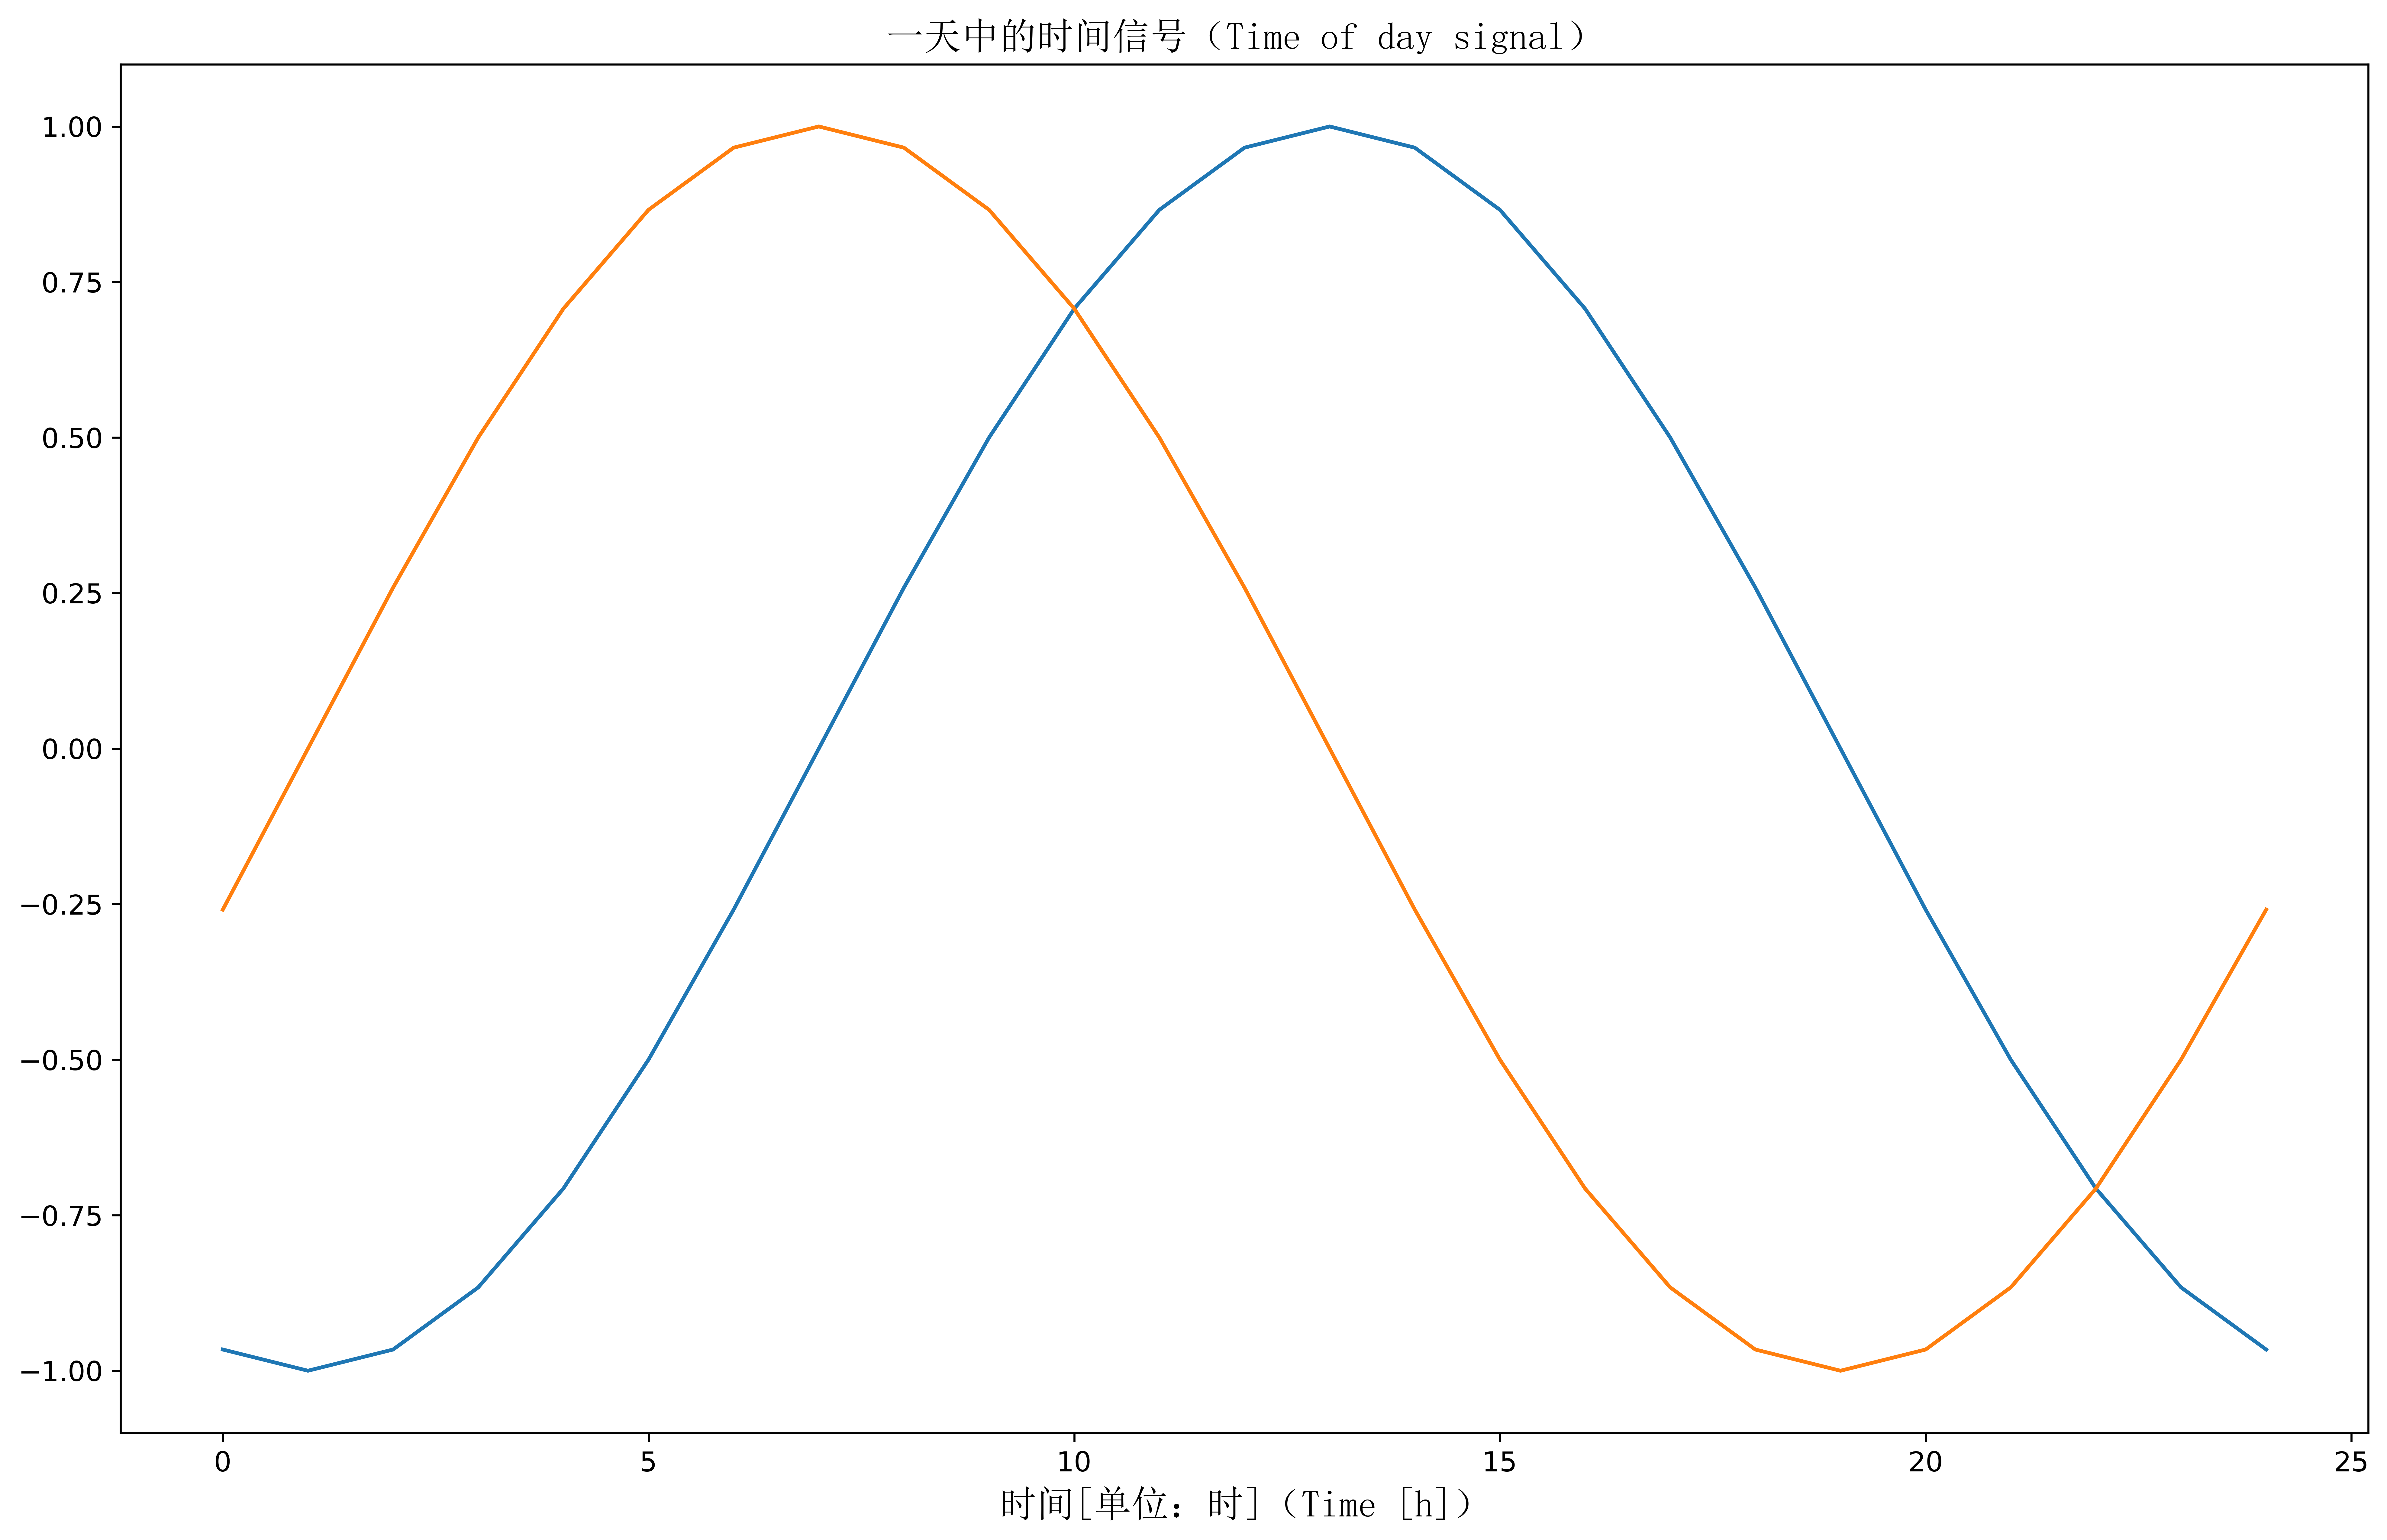

In [14]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('时间[单位：时]（Time [h]）',FontProperties=font_set)
plt.title('一天中的时间信号（Time of day signal）',FontProperties=font_set)

In [15]:
df[['wv','max. wv','wd']]  

wv  max. wv     wd
5       0.21     0.63  192.7
11      0.25     0.63  190.3
17      0.18     0.63  167.2
23      0.10     0.38  240.0
29      0.40     0.88  157.0
...      ...      ...    ...
420521  0.87     1.36  190.6
420527  1.02     1.92  225.4
420533  0.71     1.56  158.7
420539  0.35     0.68  216.7
420545  0.56     1.00  202.6

[70091 rows x 3 columns]

In [16]:
result_df[['Wx','Wy','max Wx','max Wy']]  

Wx        Wy    max Wx    max Wy
0     -0.204862 -0.046168 -0.614587 -0.138503
1     -0.245971 -0.044701 -0.619848 -0.112645
2     -0.175527  0.039879 -0.614344  0.139576
3     -0.050000 -0.086603 -0.190000 -0.329090
4     -0.368202  0.156292 -0.810044  0.343843
...         ...       ...       ...       ...
70086 -0.855154 -0.160038 -1.336792 -0.250174
70087 -0.716196 -0.726267 -1.348134 -1.367090
70088 -0.661501  0.257908 -1.453438  0.566672
70089 -0.280621 -0.209169 -0.545207 -0.406385
70090 -0.516998 -0.215205 -0.923210 -0.384295

[70091 rows x 4 columns]

In [17]:
df[df['wv']<0]['wv']

343583   -9999.0
343589   -9999.0
343595   -9999.0
Name: wv, dtype: float64

In [18]:
df[df['max. wv']<0]['max. wv']

343577   -9999.0
343583   -9999.0
343589   -9999.0
343595   -9999.0
Name: max. wv, dtype: float64

In [19]:
wv = df['wv']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

In [20]:
print(df['wv'].min())
print(df['max. wv'].min())

0.0
0.0


Text(0, 0.5, '风速 [单位：米/秒]')

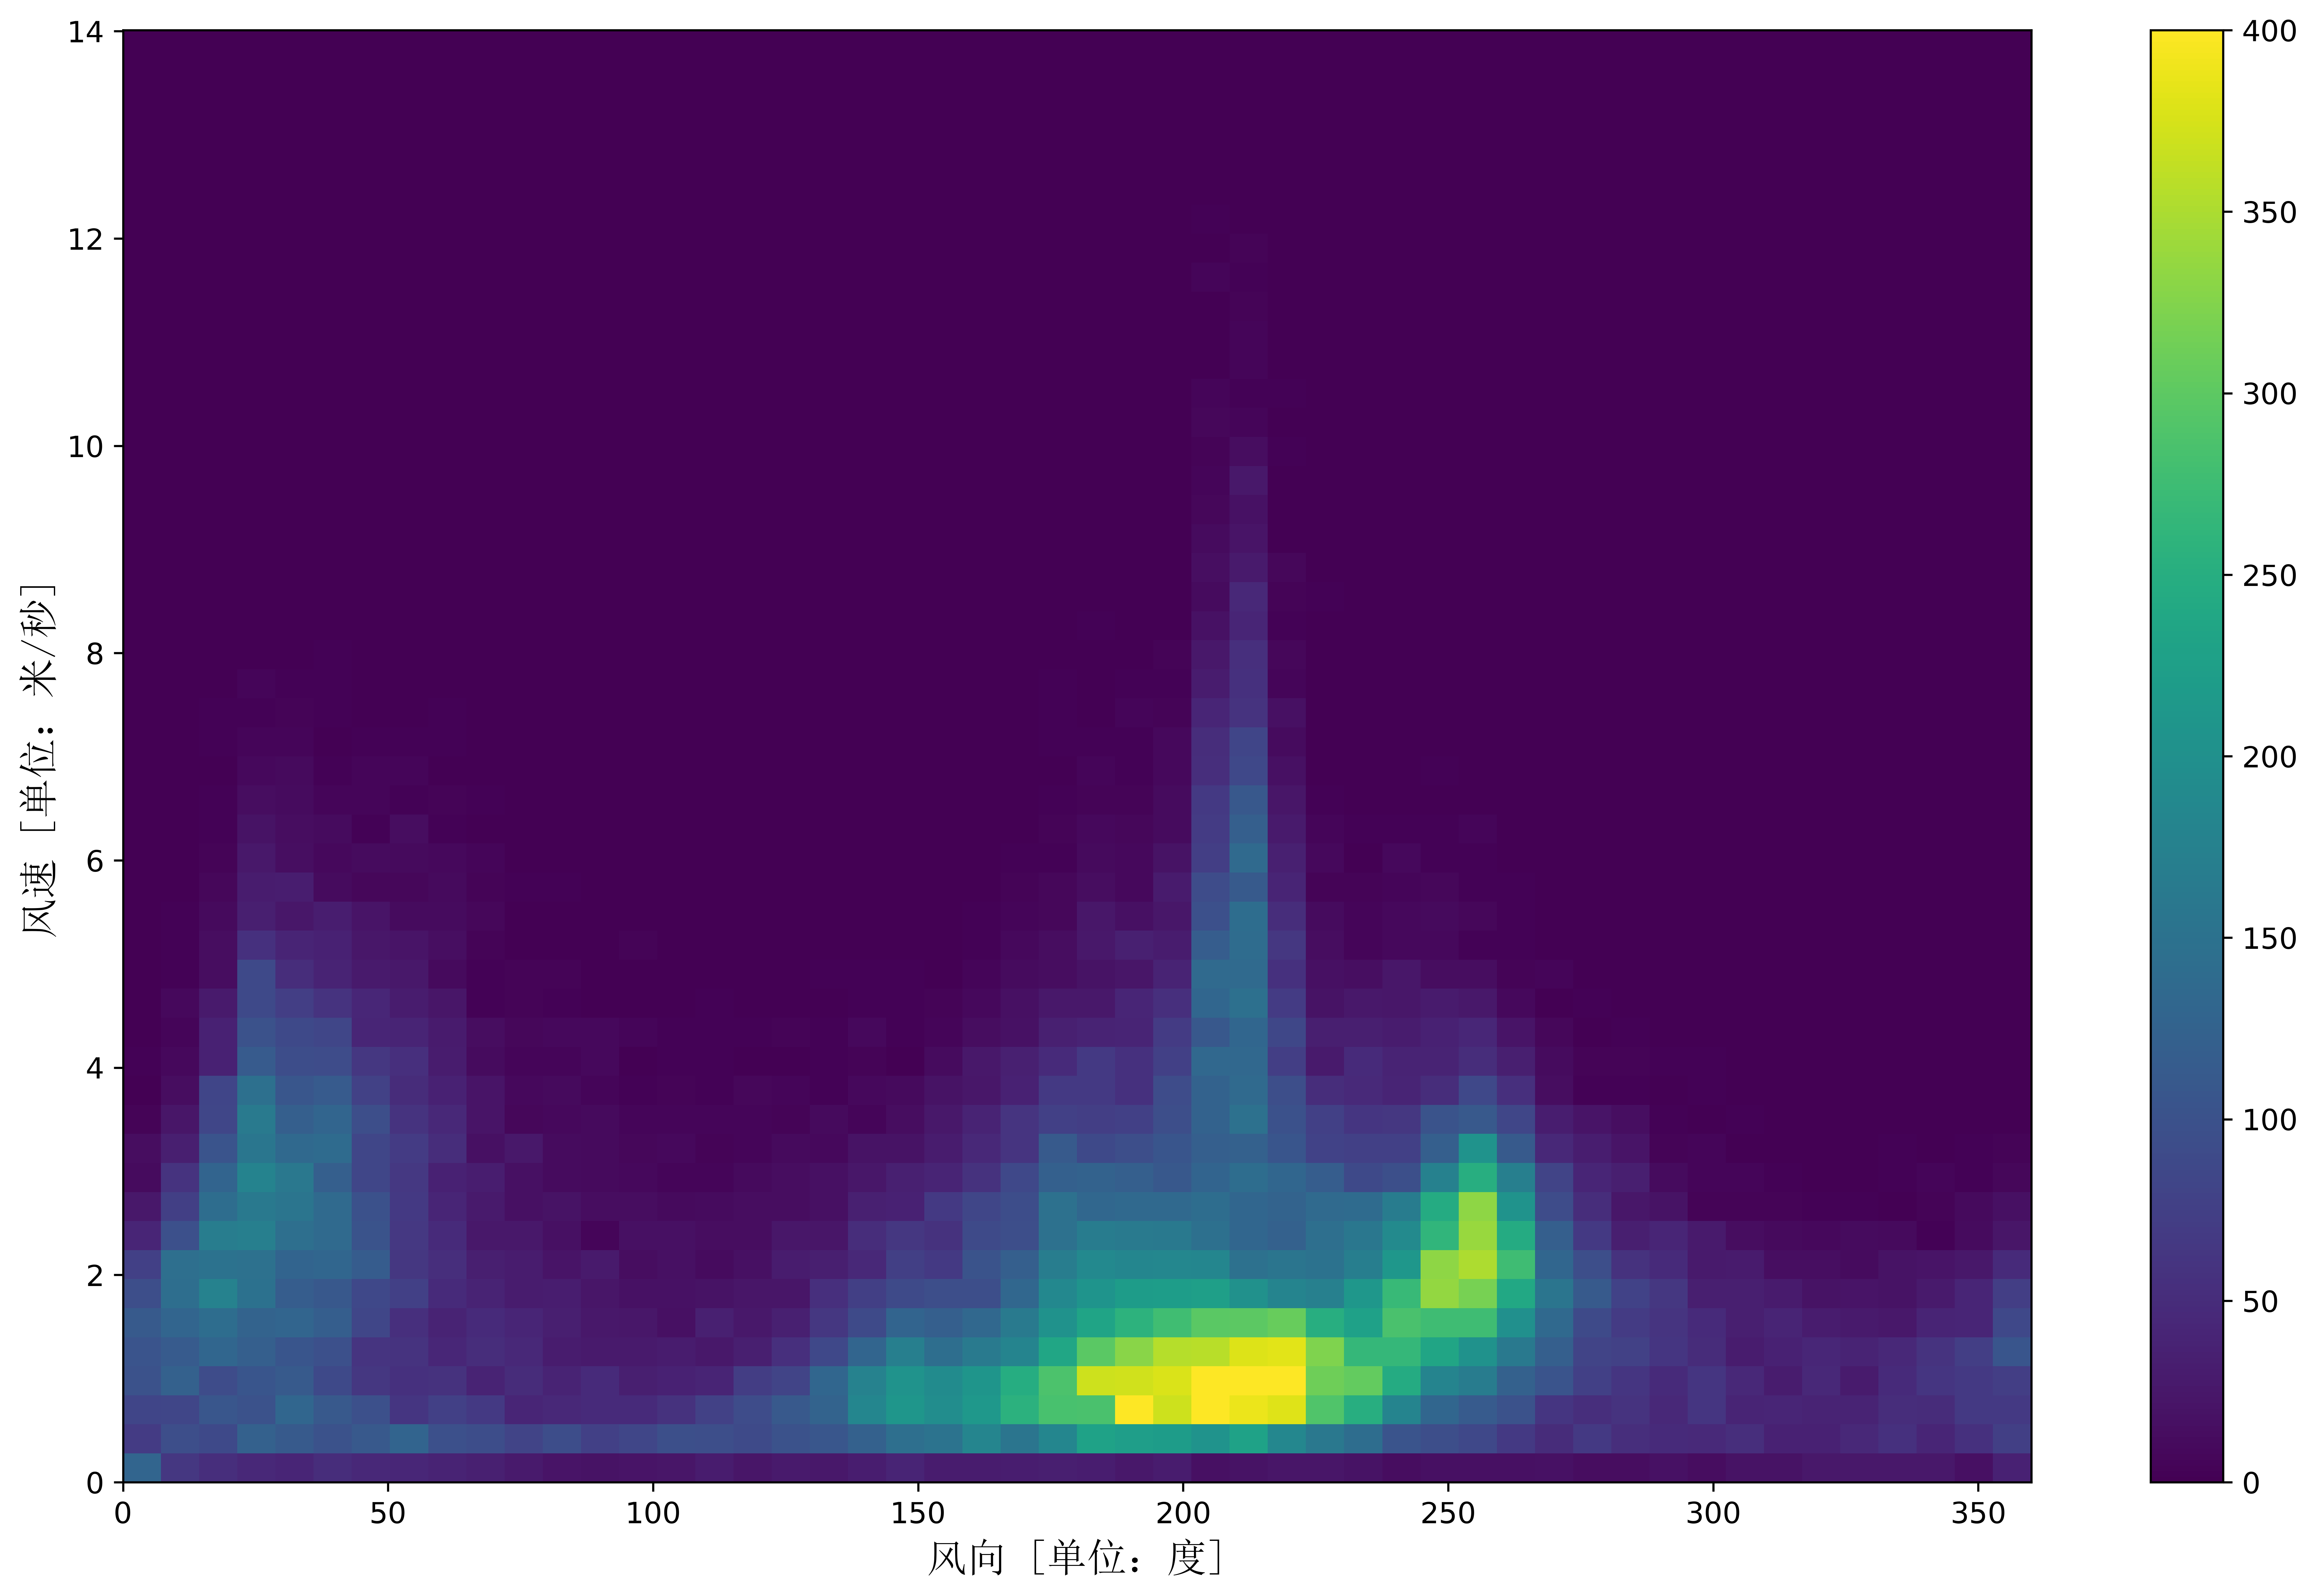

In [21]:
plt.hist2d(df['wd'], df['wv'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('风向 [单位：度]',FontProperties=font_set)
plt.ylabel('风速 [单位：米/秒]',FontProperties=font_set)

In [22]:
wv = df.pop('wv')
max_wv = df.pop('max. wv')


wd_rad = df.pop('wd')*np.pi / 180


df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

Text(0, 0.5, '风的Y分量[单位：m/s]')

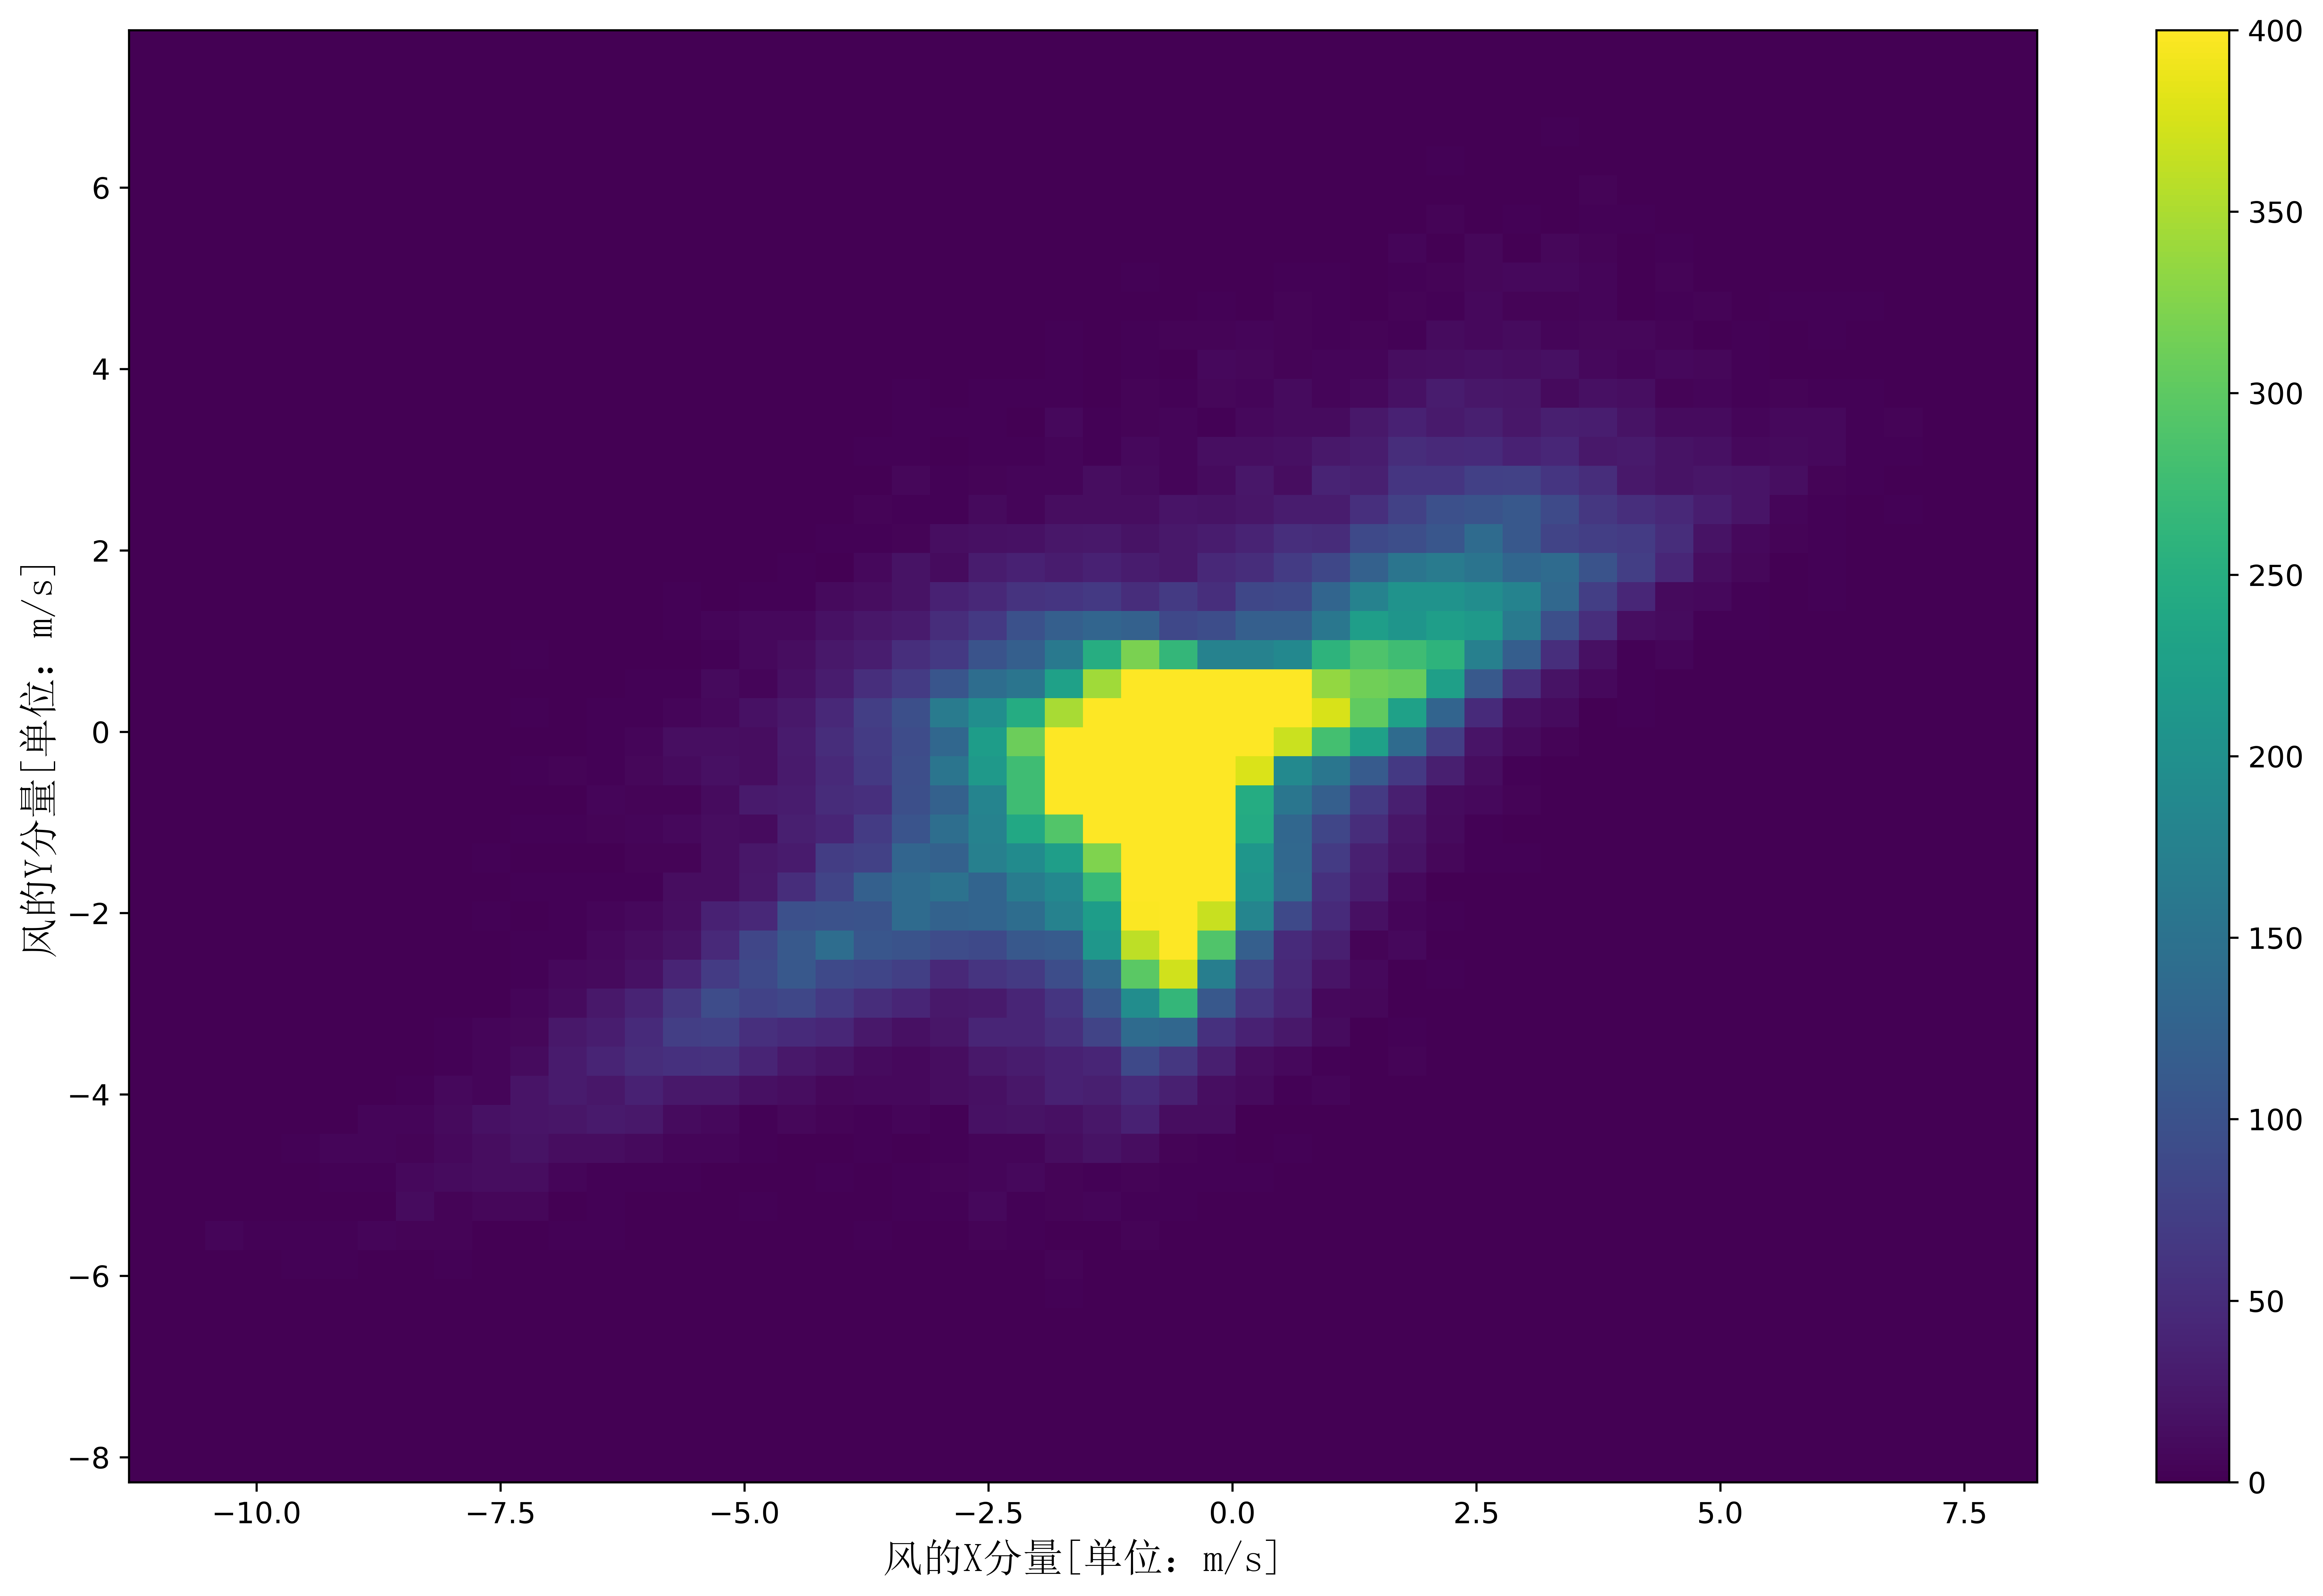

In [23]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('风的X分量[单位：m/s]',FontProperties=font_set)
plt.ylabel('风的Y分量[单位：m/s]',FontProperties=font_set)

 

In [24]:
n = len(df)                 
num_features = df.shape[1]  

print(n,num_features)       

70091 19


In [25]:

train_df = df[0:int(n*0.7)]         
val_df = df[int(n*0.7):int(n*0.9)]  
test_df = df[int(n*0.9):]          

In [26]:
train_mean = train_df.mean()  
train_std = train_df.std()   

train_df = (train_df - train_mean) / train_std  
val_df = (val_df - train_mean) / train_std      
test_df = (test_df - train_mean) / train_std    

In [27]:
df_std = (df - train_mean) / train_std  
df_std  

p         T      Tpot      Tdew        rh     VPmax     VPact  \
5       0.945308 -1.982473 -2.041888 -1.918973  1.117102 -1.302851 -1.477323   
11      0.959770 -2.078372 -2.138166 -2.060964  1.044617 -1.330143 -1.534354   
17      0.986284 -2.070284 -2.132435 -2.045187  1.062738 -1.328843 -1.527225   
23      1.004362 -2.098014 -2.161090 -2.096820  1.008375 -1.336641 -1.546235   
29      1.061006 -2.165028 -2.232152 -2.187178  0.984214 -1.353535 -1.579503   
...          ...       ...       ...       ...       ...       ...       ...   
420521  1.629854 -1.165600 -1.281981 -1.428459 -0.235937 -0.996148 -1.251577   
420527  1.535849 -1.214127 -1.322097 -1.640728 -0.580840 -1.019541 -1.356133   
420533  1.510540 -1.370107 -1.475683 -1.649333 -0.181573 -1.087119 -1.358509   
420539  1.445460 -1.386283 -1.487144 -1.685190 -0.217815 -1.094917 -1.375143   
420545  1.380380 -1.506445 -1.600615 -1.820009 -0.199694 -1.143002 -1.436926   

           VPdef        sh      H2OC       rho   Day sin   Day cos  Year sin  \
5      -0.790424 -1.480036 -1.482697  2.218524 -1.366064 -0.366026 -0.069373   
11     -0.786272 -1.536190 -1.539035  2.325708 -1.414249  0.000015 -0.068349   
17     -0.788348 -1.528703 -1.531992  2.323998 -1.366064  0.366057 -0.067326   
23     -0.782121 -1.547420 -1.553119  2.358913 -1.224793  0.707153 -0.066303   
29     -0.782121 -1.581113 -1.585982  2.446320 -1.000062  1.000060 -0.065280   
...          ...       ...       ...       ...       ...       ...       ...   
420521 -0.499831 -1.262910 -1.264390  1.555401  0.305945 -1.380737 -0.073867   
420527 -0.443788 -1.363986 -1.365328  1.583967 -0.061810 -1.412915 -0.072844   
420533 -0.549647 -1.367729 -1.370023  1.734122 -0.425362 -1.348804 -0.071821   
420539 -0.545496 -1.382704 -1.384107  1.734366 -0.759934 -1.192773 -0.070798   
420545 -0.570403 -1.442601 -1.445139  1.841305 -1.042727 -0.955456 -0.069775   

        Year cos        Wx        Wy    max Wx    max Wy  
5       1.427981  0.193409  0.221161  0.111140  0.217928  
11      1.427977  0.172987  0.222101  0.109458  0.227798  
17      1.427971  0.207983  0.276266  0.111218  0.324078  
23      1.427965  0.270343  0.195267  0.246907  0.145176  
29      1.427958  0.112264  0.350818  0.048640  0.402053  
...          ...       ...       ...       ...       ...  
420521  1.427994 -0.129648  0.148238 -0.119794  0.175300  
420527  1.427992 -0.060615 -0.214379 -0.123420 -0.251059  
420533  1.427990 -0.033443  0.415894 -0.157093  0.487113  
420539  1.427987  0.155773  0.116774  0.133325  0.115670  
420545  1.427983  0.038344  0.112908  0.012454  0.124102  

[70091 rows x 19 columns]

In [28]:
df_std = df_std.melt(var_name='Column', value_name='Normalized')
df_std

Column  Normalized
0             p    0.945308
1             p    0.959770
2             p    0.986284
3             p    1.004362
4             p    1.061006
...         ...         ...
1331724  max Wy    0.175300
1331725  max Wy   -0.251059
1331726  max Wy    0.487113
1331727  max Wy    0.115670
1331728  max Wy    0.124102

[1331729 rows x 2 columns]

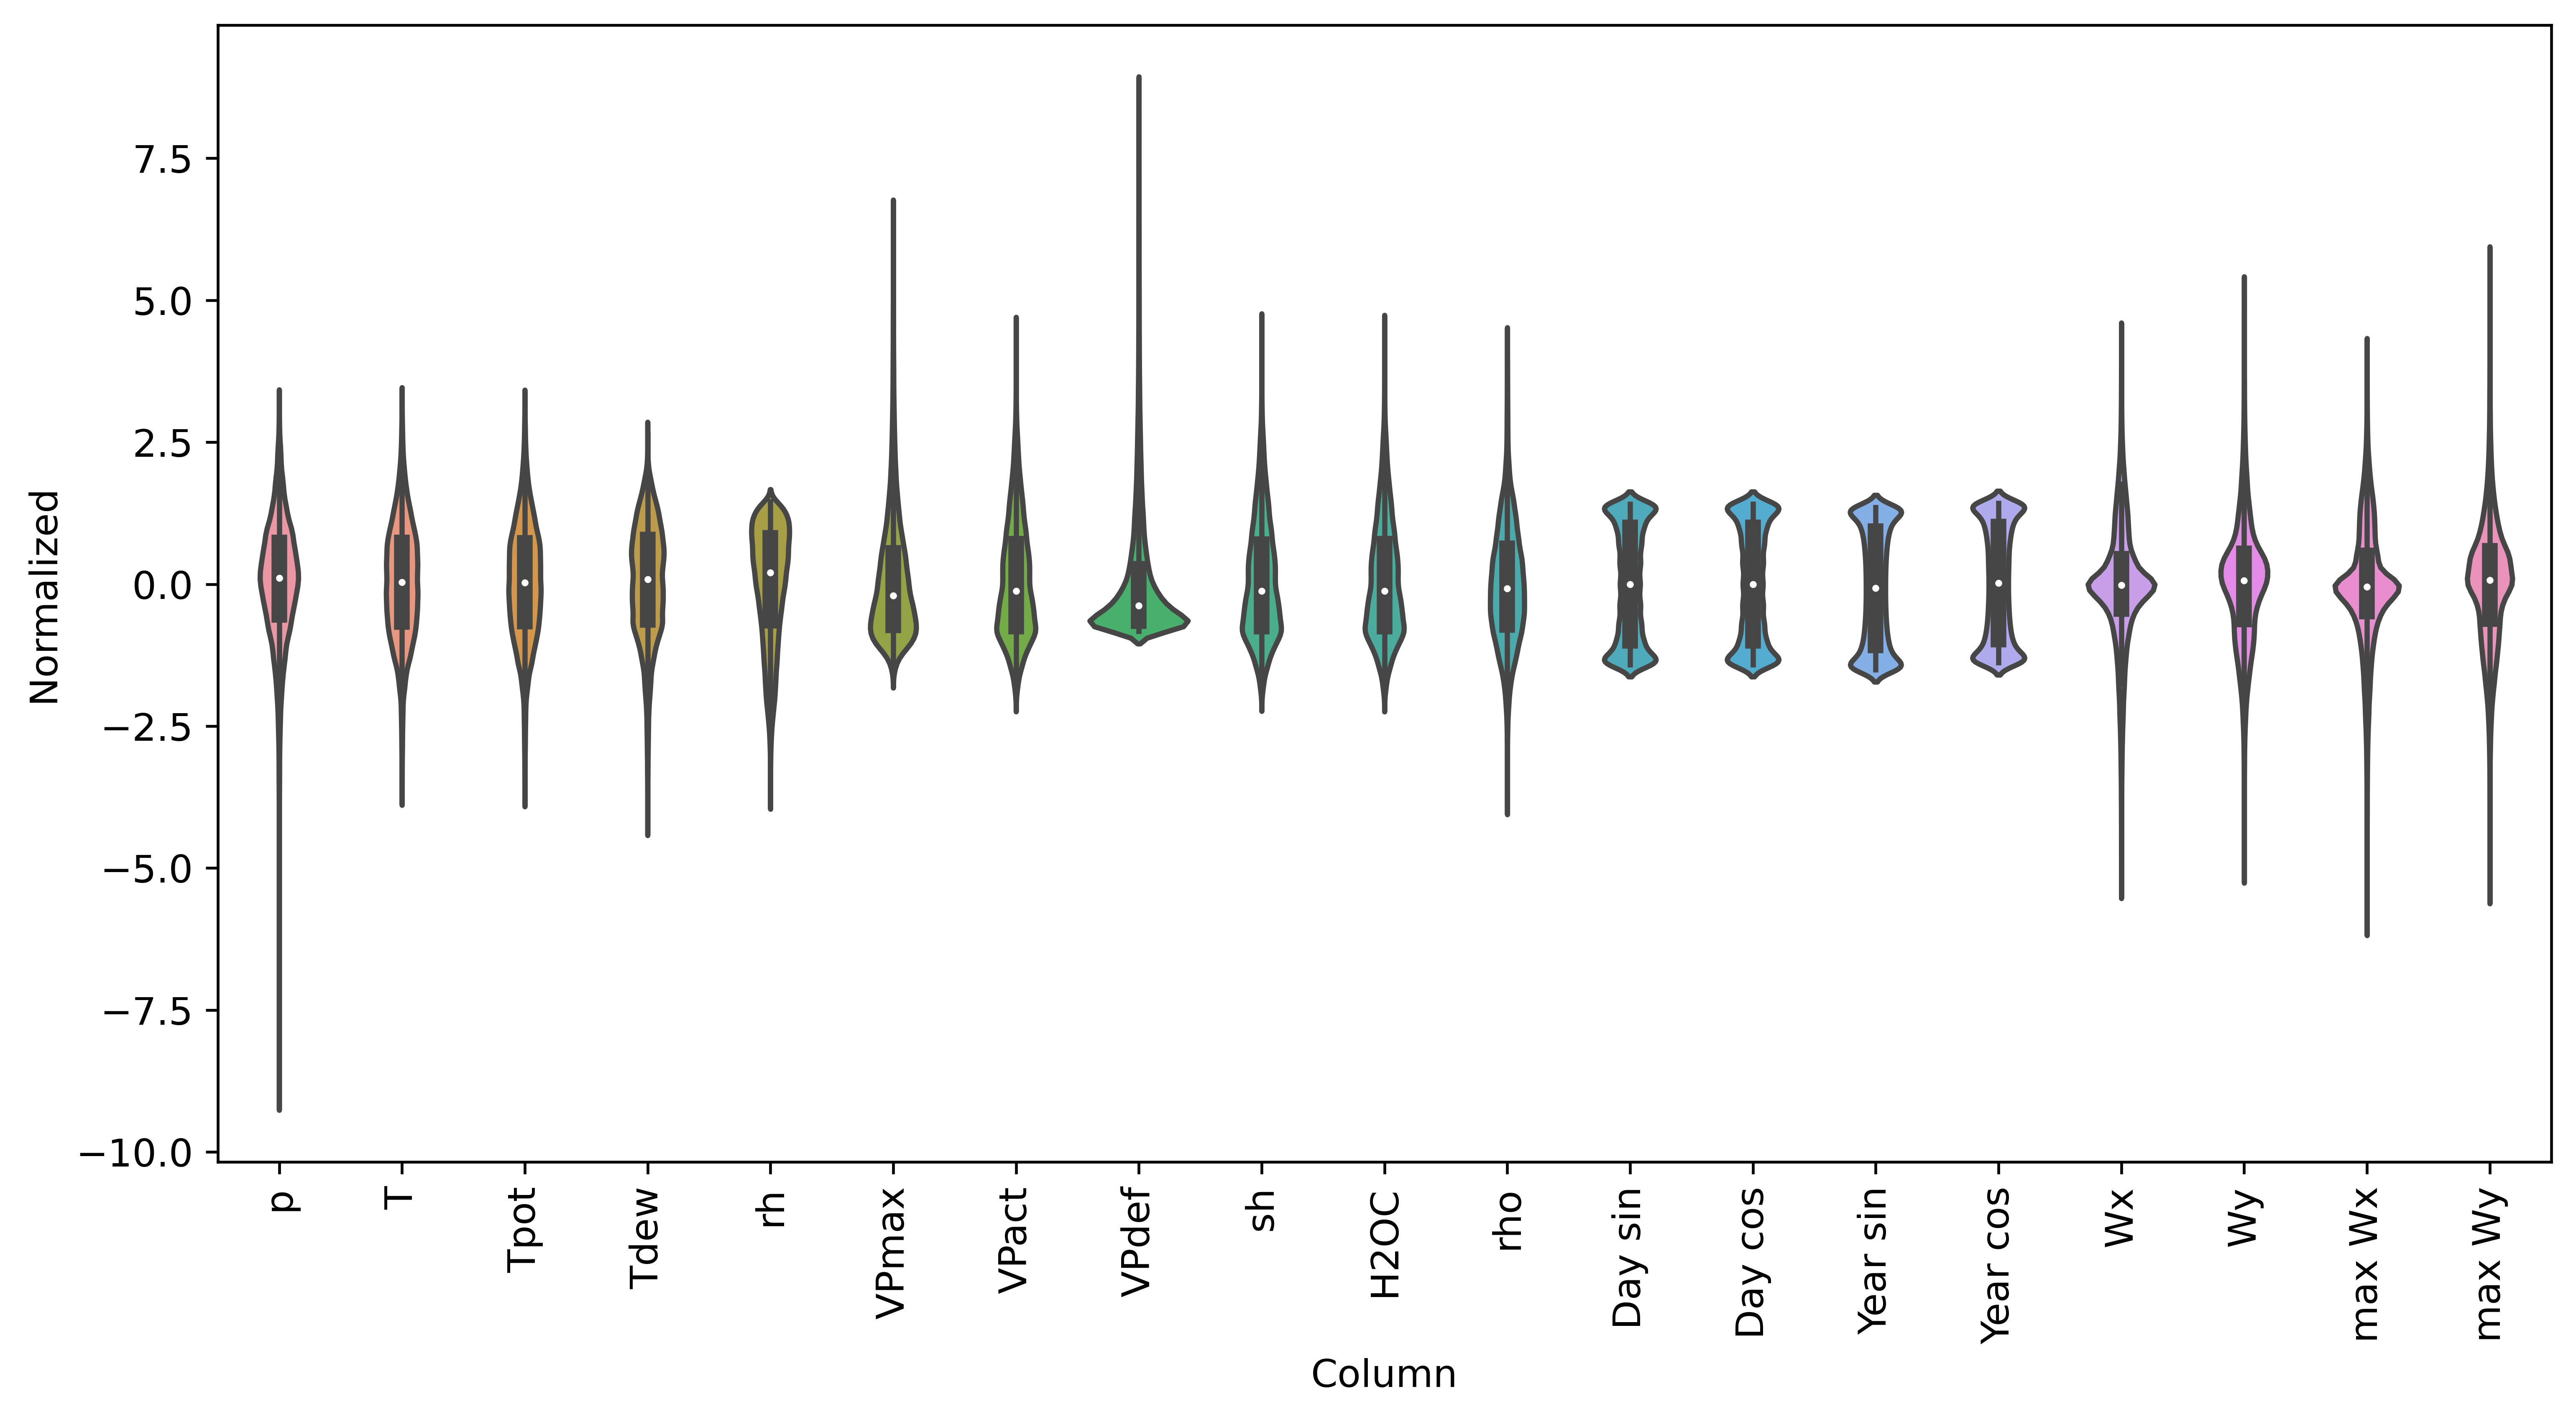

In [29]:
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [30]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):
      
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

     
        self.label_columns = label_columns
        
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
       
        self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}  
        
  
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_indices = np.arange(self.total_window_size)[0:input_width]

        self.label_start = self.total_window_size - self.label_width
        self.label_indices = np.arange(self.total_window_size)[self.label_start:]

    def __repr__(self):
        return '\n'.join([
              f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [31]:
def split_window(self, features):
    
    inputs = features[:, 0:self.input_width, :]  
    labels = features[:, self.label_start:, :]  
    
    if self.label_columns is not None:  
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

  
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels


WindowGenerator.split_window = split_window

In [32]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,  
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [33]:


@property
def createTrainSet(self):
    return self.make_dataset(self.train_df)

@property
def createValSet(self):
    return self.make_dataset(self.val_df)

@property
def createTestSet(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    
    result = getattr(self, '_example', None)  
    if result is None:
   
          result = next(iter(self.createTrainSet))
          self._example = result
    return result


WindowGenerator.createTrainSet = createTrainSet
WindowGenerator.createValSet = createValSet
WindowGenerator.createTestSet = createTestSet
WindowGenerator.example = example

In [34]:
def plot(self, model=None, plot_col='T', max_subplots=3):
        inputs, labels = self.example
        plot_col_index = self.column_indices[plot_col]  
        max_n = min(max_subplots, len(inputs)) 
        for n in range(max_n):
            plt.subplot(3, 1, n+1)           
            plt.ylabel(f'标准化后的 {plot_col}',FontProperties=font_set) 
            
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.',zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            
            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='green', s=64)
            
            
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                            marker='X', edgecolors='k', label='Predictions',
                            c='orange', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [35]:
single_window = WindowGenerator(input_width=6, label_width=5, shift=1,label_columns=['T'])


single_window

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [2 3 4 5 6]
Label column name(s): ['T']

In [36]:

multi_window = WindowGenerator(input_width=6, label_width=5, shift=24)

multi_window


Total window size: 30
Input indices: [0 1 2 3 4 5]
Label indices: [25 26 27 28 29]
Label column name(s): None

In [37]:
print('训练数据:')
print(multi_window.createTrainSet)
print('验证数据：')
print(multi_window.createValSet)
print('测试数据：')
print(multi_window.createTestSet)

训练数据:
<MapDataset shapes: ((None, 6, 19), (None, 5, 19)), types: (tf.float32, tf.float32)>
验证数据：
<MapDataset shapes: ((None, 6, 19), (None, 5, 19)), types: (tf.float32, tf.float32)>
测试数据：
<MapDataset shapes: ((None, 6, 19), (None, 5, 19)), types: (tf.float32, tf.float32)>


In [38]:
for train_inputs, train_labels in multi_window.createTrainSet.take(1):
    print(f'Inputs shape (batch, time, features): {train_inputs.shape}')
    print(f'Labels shape (batch, time, features): {train_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 5, 19)


In [39]:
multi_conv_model = tf.keras.Sequential([
    
   
  
    tf.keras.layers.Conv1D(filters=64,kernel_size=3,strides=1, activation='relu'),

  
    
    tf.keras.layers.Flatten(),
    
   
    tf.keras.layers.Dense(5*19,kernel_initializer=tf.initializers.zeros),
    
  
    tf.keras.layers.Reshape([5, 19])
])

In [40]:

MAX_EPOCHS = 20
def compile_and_fit(model, window):
    
 
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])

   
    history = model.fit(window.createTrainSet, epochs=MAX_EPOCHS,validation_data=window.createValSet,callbacks=[early_stopping],verbose=2)
    return history

In [41]:
history = compile_and_fit(multi_conv_model, multi_window)

Epoch 1/20
1533/1533 - 3s - loss: 0.2963 - mean_absolute_error: 0.3546 - val_loss: 0.2988 - val_mean_absolute_error: 0.3536
Epoch 2/20
1533/1533 - 2s - loss: 0.2812 - mean_absolute_error: 0.3413 - val_loss: 0.2928 - val_mean_absolute_error: 0.3488
Epoch 3/20
1533/1533 - 2s - loss: 0.2776 - mean_absolute_error: 0.3387 - val_loss: 0.2897 - val_mean_absolute_error: 0.3462
Epoch 4/20
1533/1533 - 2s - loss: 0.2752 - mean_absolute_error: 0.3373 - val_loss: 0.2936 - val_mean_absolute_error: 0.3479
Epoch 5/20
1533/1533 - 2s - loss: 0.2736 - mean_absolute_error: 0.3362 - val_loss: 0.2906 - val_mean_absolute_error: 0.3482


In [42]:
multi_conv_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 64)             3712      
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 95)                24415     
_________________________________________________________________
reshape (Reshape)            (None, 5, 19)             0         
Total params: 28,127
Trainable params: 28,127
Non-trainable params: 0
_________________________________________________________________


In [43]:

multi_val_performance = {}
multi_test_performance = {}


multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.createValSet,verbose=0)
multi_test_performance['Conv'] = multi_conv_model.evaluate(multi_window.createTestSet, verbose=0)

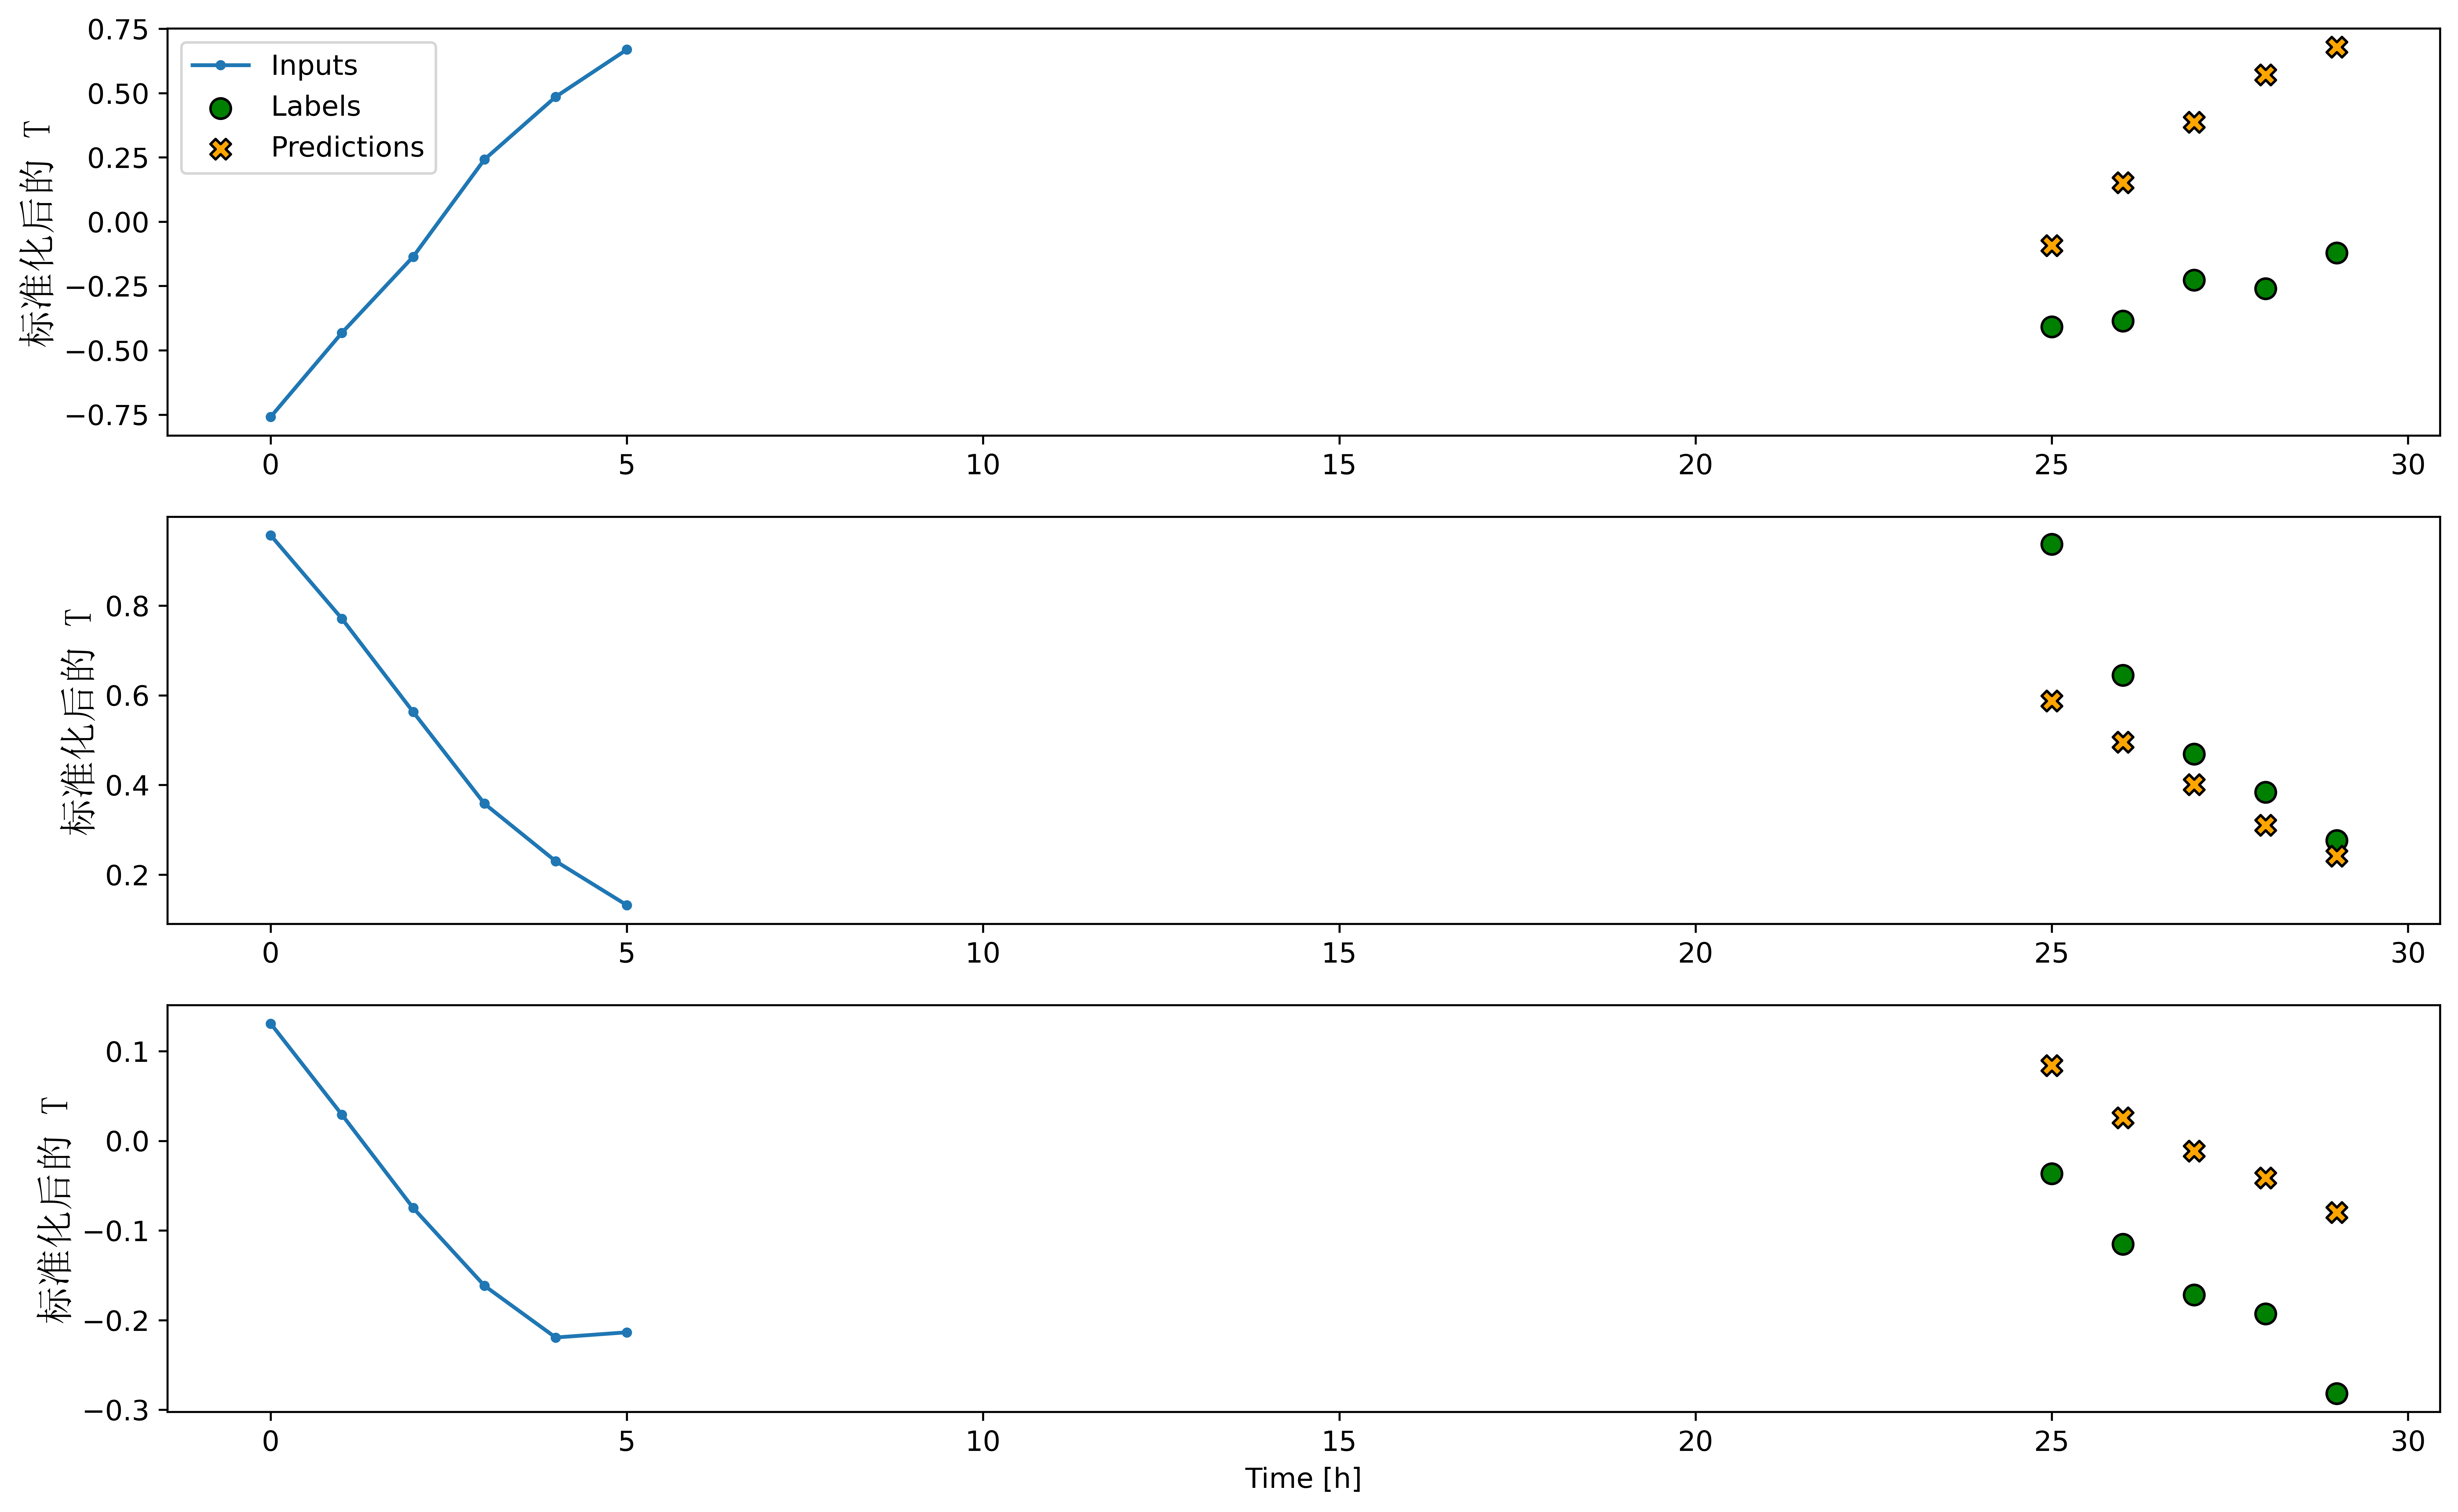

In [44]:
multi_window.plot(multi_conv_model)

In [45]:
multi_lstm_model = tf.keras.Sequential([
    
    
    tf.keras.layers.LSTM(64, activation='tanh',return_sequences=False),
    
    
    tf.keras.layers.Dense(5*19,kernel_initializer=tf.initializers.zeros),
    
   
    tf.keras.layers.Reshape([5, 19])
])

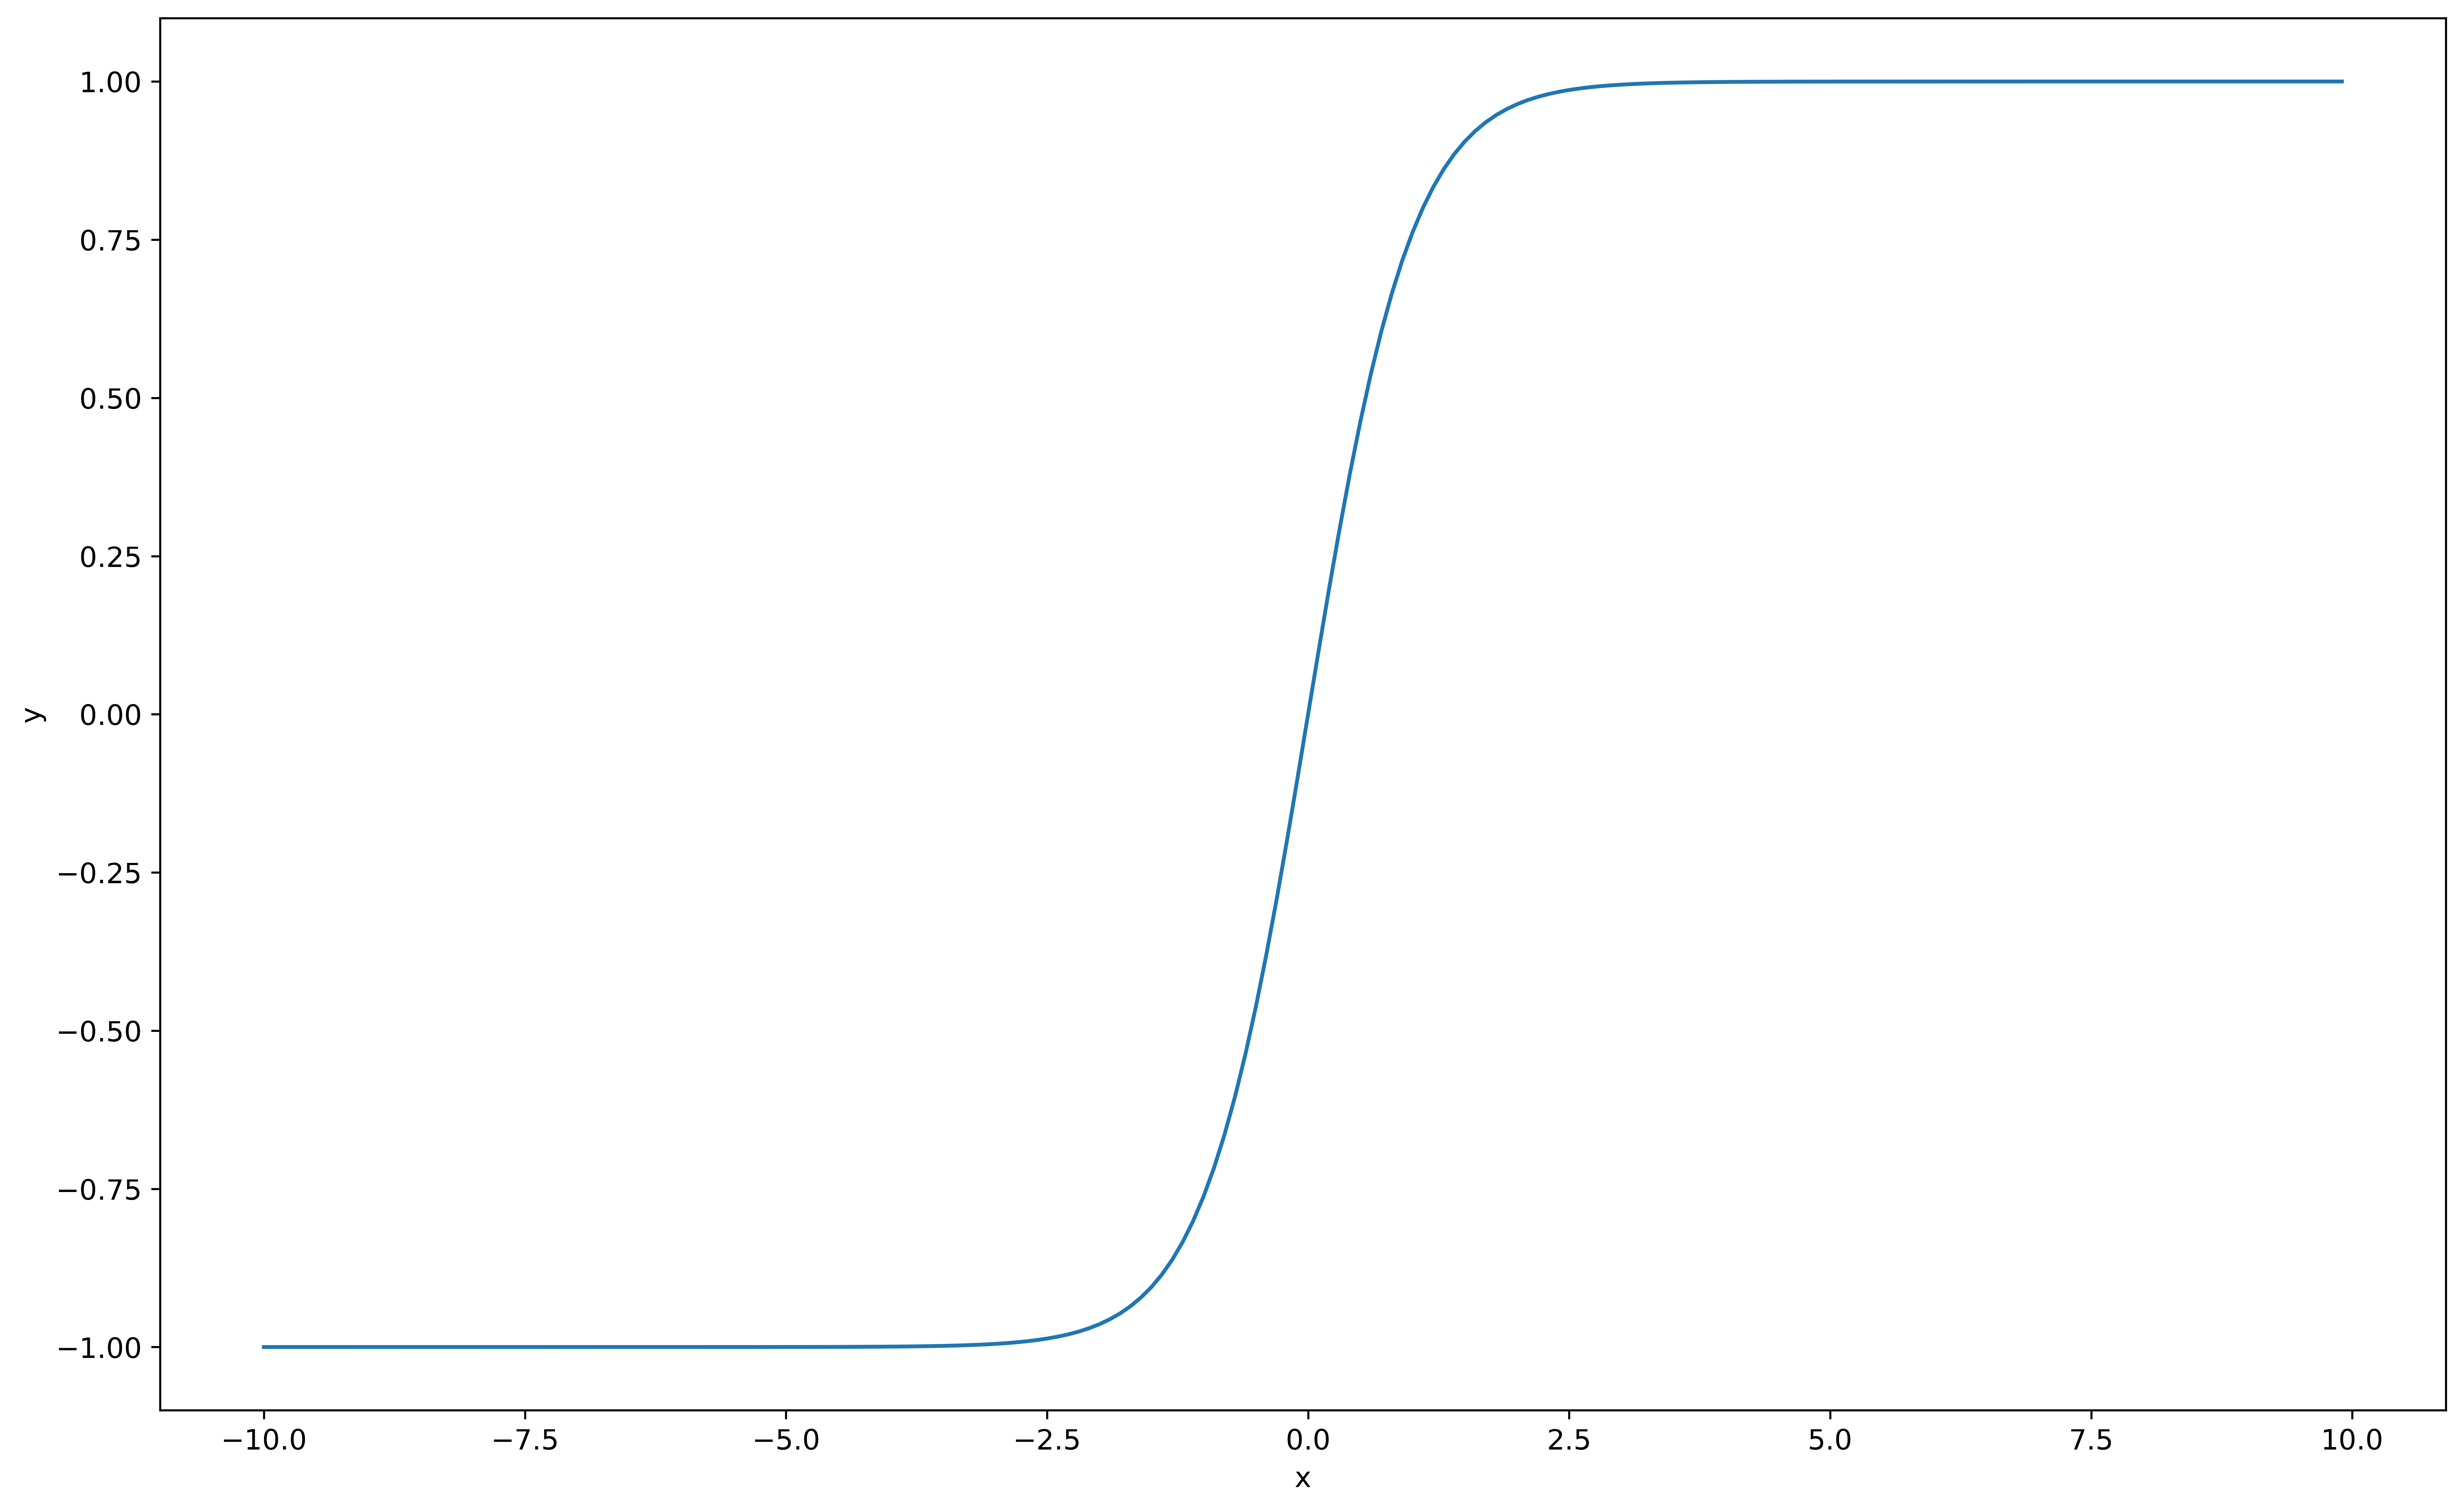

In [46]:

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
inputs=np.arange(-10,10,0.1)
outputs=tanh(inputs)
plt.plot(inputs,outputs)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [47]:
history = compile_and_fit(multi_lstm_model, multi_window)

Epoch 1/20
1533/1533 - 6s - loss: 0.3135 - mean_absolute_error: 0.3743 - val_loss: 0.2857 - val_mean_absolute_error: 0.3447
Epoch 2/20
1533/1533 - 5s - loss: 0.2734 - mean_absolute_error: 0.3370 - val_loss: 0.2817 - val_mean_absolute_error: 0.3412
Epoch 3/20
1533/1533 - 5s - loss: 0.2671 - mean_absolute_error: 0.3316 - val_loss: 0.2821 - val_mean_absolute_error: 0.3410
Epoch 4/20
1533/1533 - 5s - loss: 0.2624 - mean_absolute_error: 0.3284 - val_loss: 0.2820 - val_mean_absolute_error: 0.3410


In [48]:
multi_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                21504     
_________________________________________________________________
dense_1 (Dense)              (None, 95)                6175      
_________________________________________________________________
reshape_1 (Reshape)          (None, 5, 19)             0         
Total params: 27,679
Trainable params: 27,679
Non-trainable params: 0
_________________________________________________________________


In [49]:
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.createValSet,verbose=0)
multi_test_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.createTestSet, verbose=0)

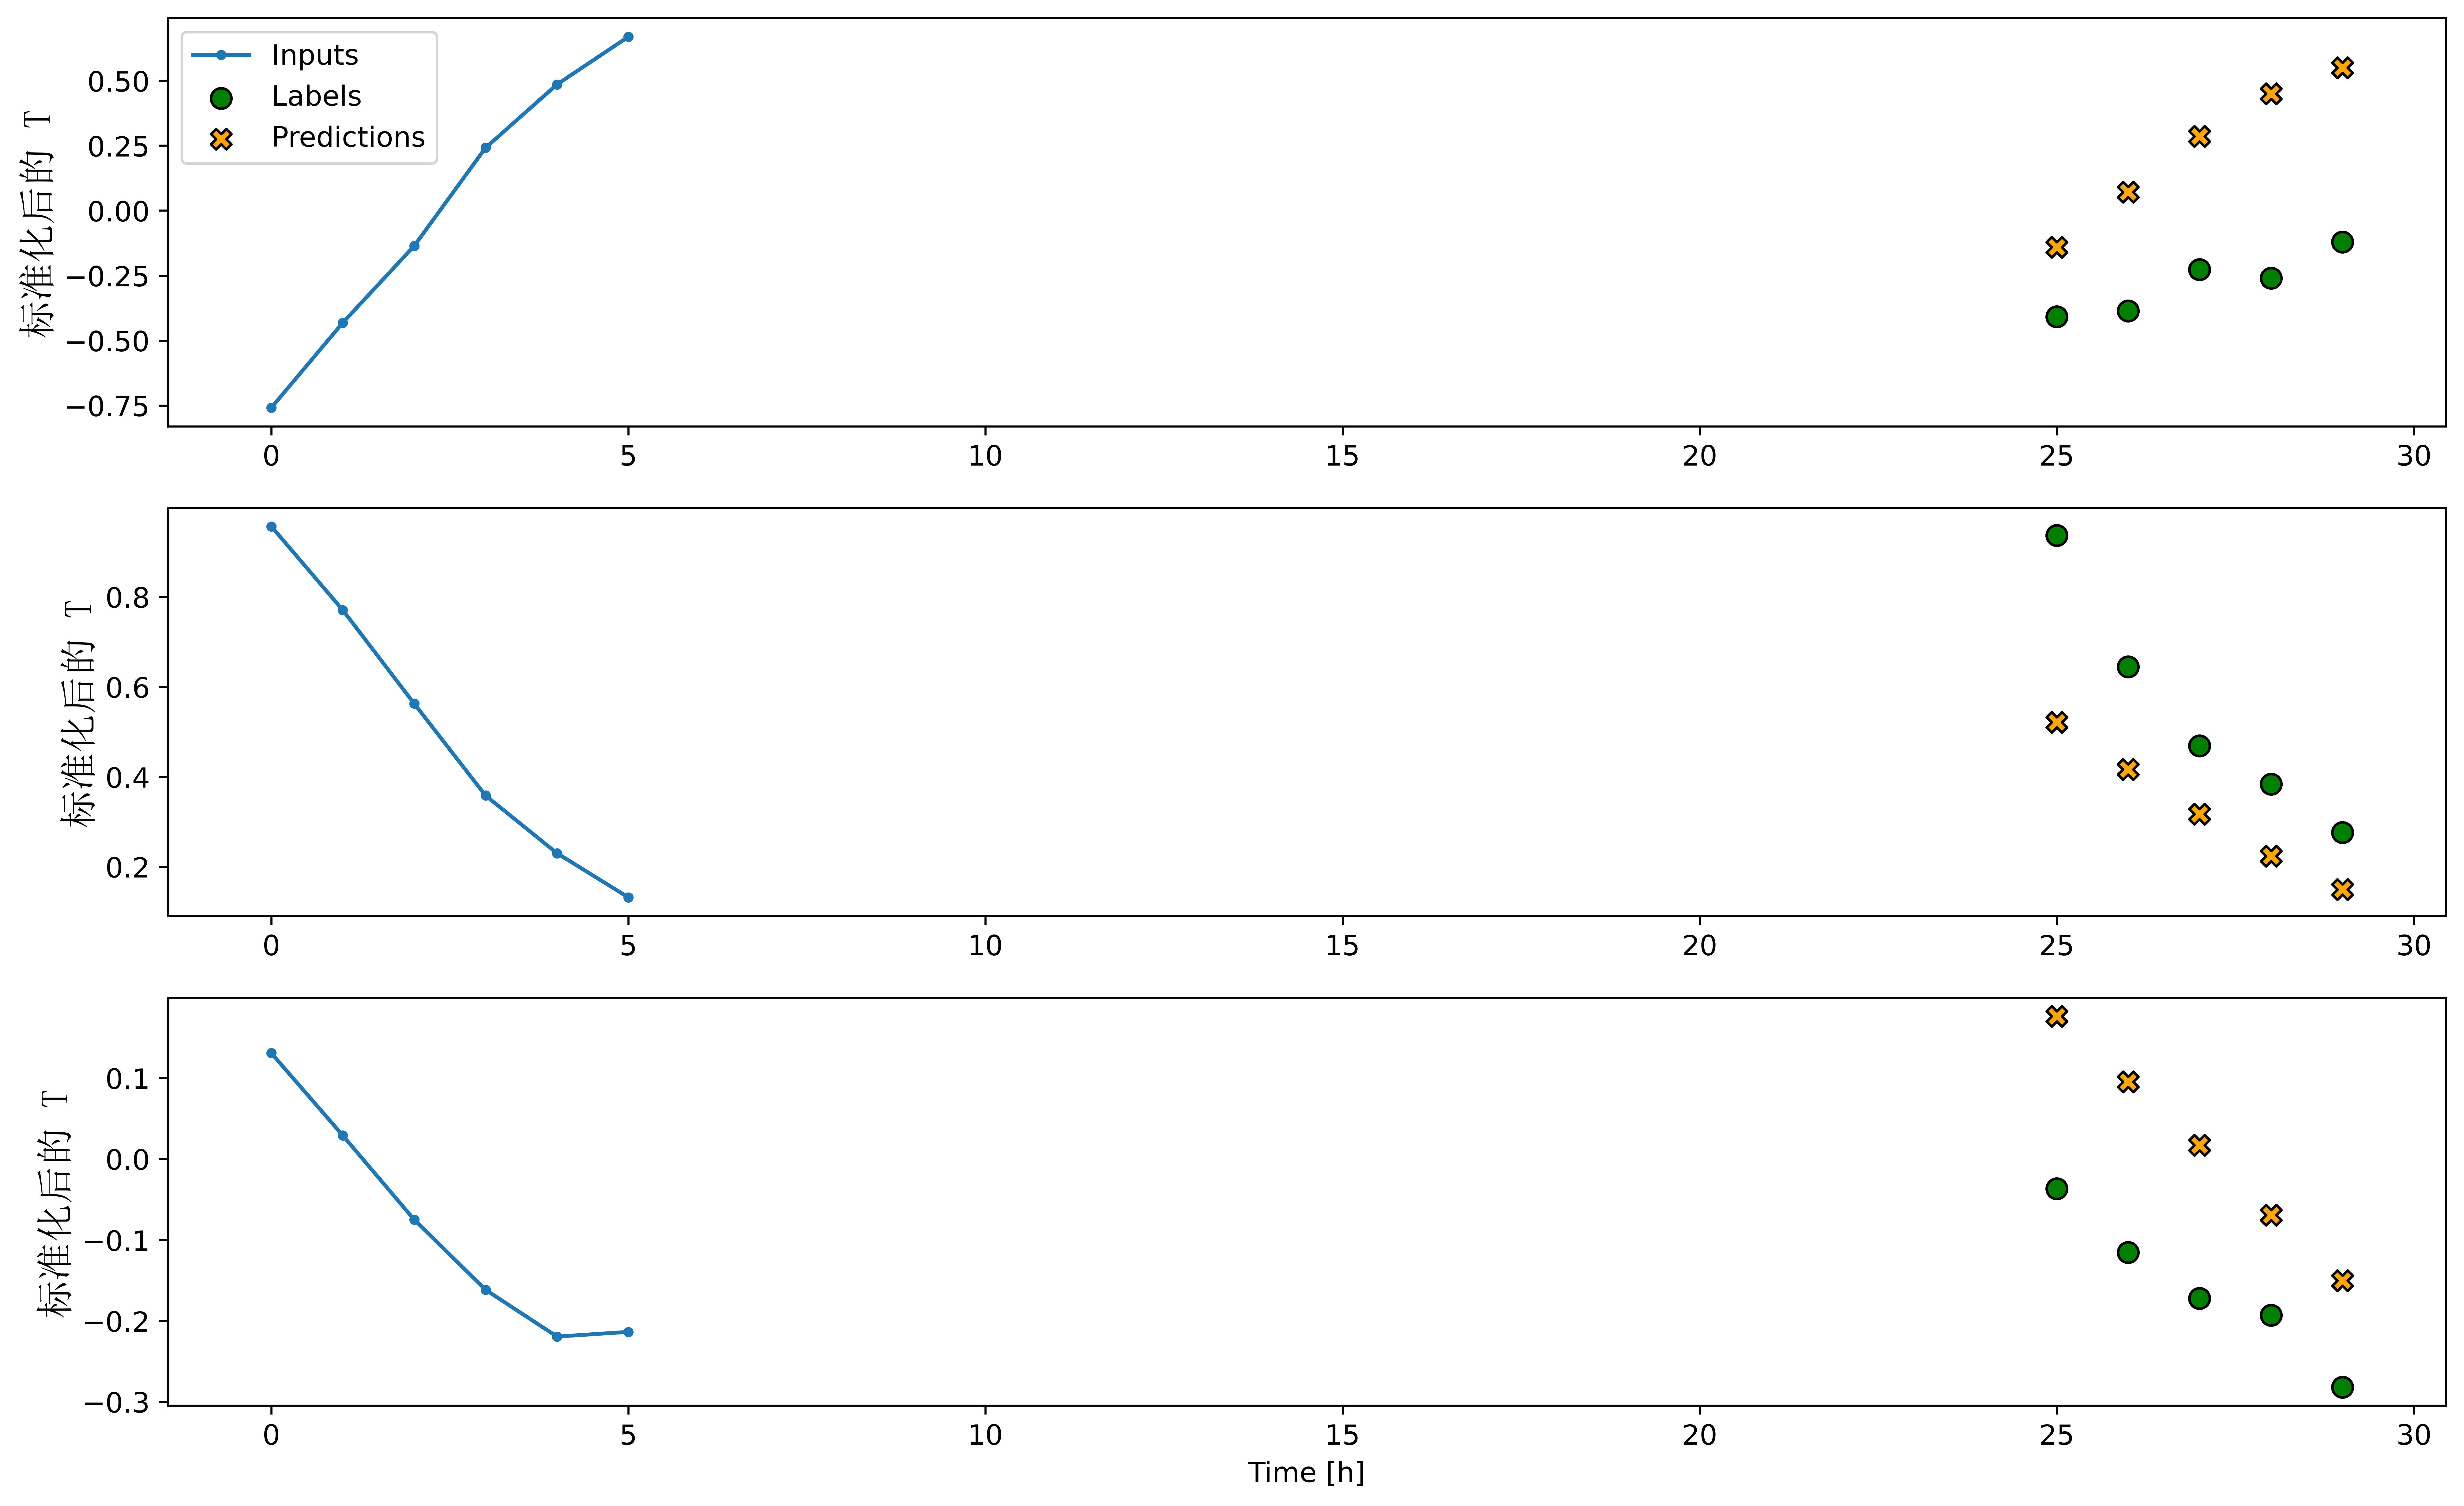

In [50]:
multi_window.plot(multi_lstm_model)

In [51]:
multi_lstm_model2 = tf.keras.models.Sequential([
   
   
    tf.keras.layers.LSTM(64, activation='tanh',return_sequences=True),
    tf.keras.layers.LSTM(64, activation='tanh',return_sequences=False),
 
    tf.keras.layers.Dense(5*19,kernel_initializer=tf.initializers.zeros),
    
   
    tf.keras.layers.Reshape([5, 19])
   
])

In [52]:
history = compile_and_fit(multi_lstm_model2, multi_window)

Epoch 1/20
1533/1533 - 9s - loss: 0.3214 - mean_absolute_error: 0.3808 - val_loss: 0.2931 - val_mean_absolute_error: 0.3517
Epoch 2/20
1533/1533 - 9s - loss: 0.2746 - mean_absolute_error: 0.3396 - val_loss: 0.2926 - val_mean_absolute_error: 0.3531
Epoch 3/20
1533/1533 - 10s - loss: 0.2662 - mean_absolute_error: 0.3336 - val_loss: 0.2940 - val_mean_absolute_error: 0.3534
Epoch 4/20
1533/1533 - 10s - loss: 0.2582 - mean_absolute_error: 0.3287 - val_loss: 0.2961 - val_mean_absolute_error: 0.3542


In [53]:
multi_lstm_model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6, 64)             21504     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 95)                6175      
_________________________________________________________________
reshape_2 (Reshape)          (None, 5, 19)             0         
Total params: 60,703
Trainable params: 60,703
Non-trainable params: 0
_________________________________________________________________


In [54]:
multi_val_performance['LSTM2'] = multi_lstm_model2.evaluate(multi_window.createValSet,verbose=0)
multi_test_performance['LSTM2'] = multi_lstm_model2.evaluate(multi_window.createTestSet,verbose=0)

In [55]:
multi_val_performance

{'Conv': [0.29063940048217773, 0.34815967082977295],
 'LSTM': [0.2820088267326355, 0.34097933769226074],
 'LSTM2': [0.29611095786094666, 0.35417449474334717]}

In [56]:
multi_test_performance

{'Conv': [0.25935858488082886, 0.3304704427719116],
 'LSTM': [0.2625604271888733, 0.33120331168174744],
 'LSTM2': [0.2720714509487152, 0.3430149555206299]}

In [57]:
metric_index = multi_lstm_model.metrics_names.index('mean_absolute_error')
metric_index

1

In [58]:
multi_val_performance.values()

dict_values([[0.29063940048217773, 0.34815967082977295], [0.2820088267326355, 0.34097933769226074], [0.29611095786094666, 0.35417449474334717]])

In [59]:
val_mae=[v[metric_index] for v in multi_val_performance.values()]
val_mae

[0.34815967082977295, 0.34097933769226074, 0.35417449474334717]

In [60]:
test_mae = [v[metric_index] for v in multi_test_performance.values()]
test_mae

[0.3304704427719116, 0.33120331168174744, 0.3430149555206299]

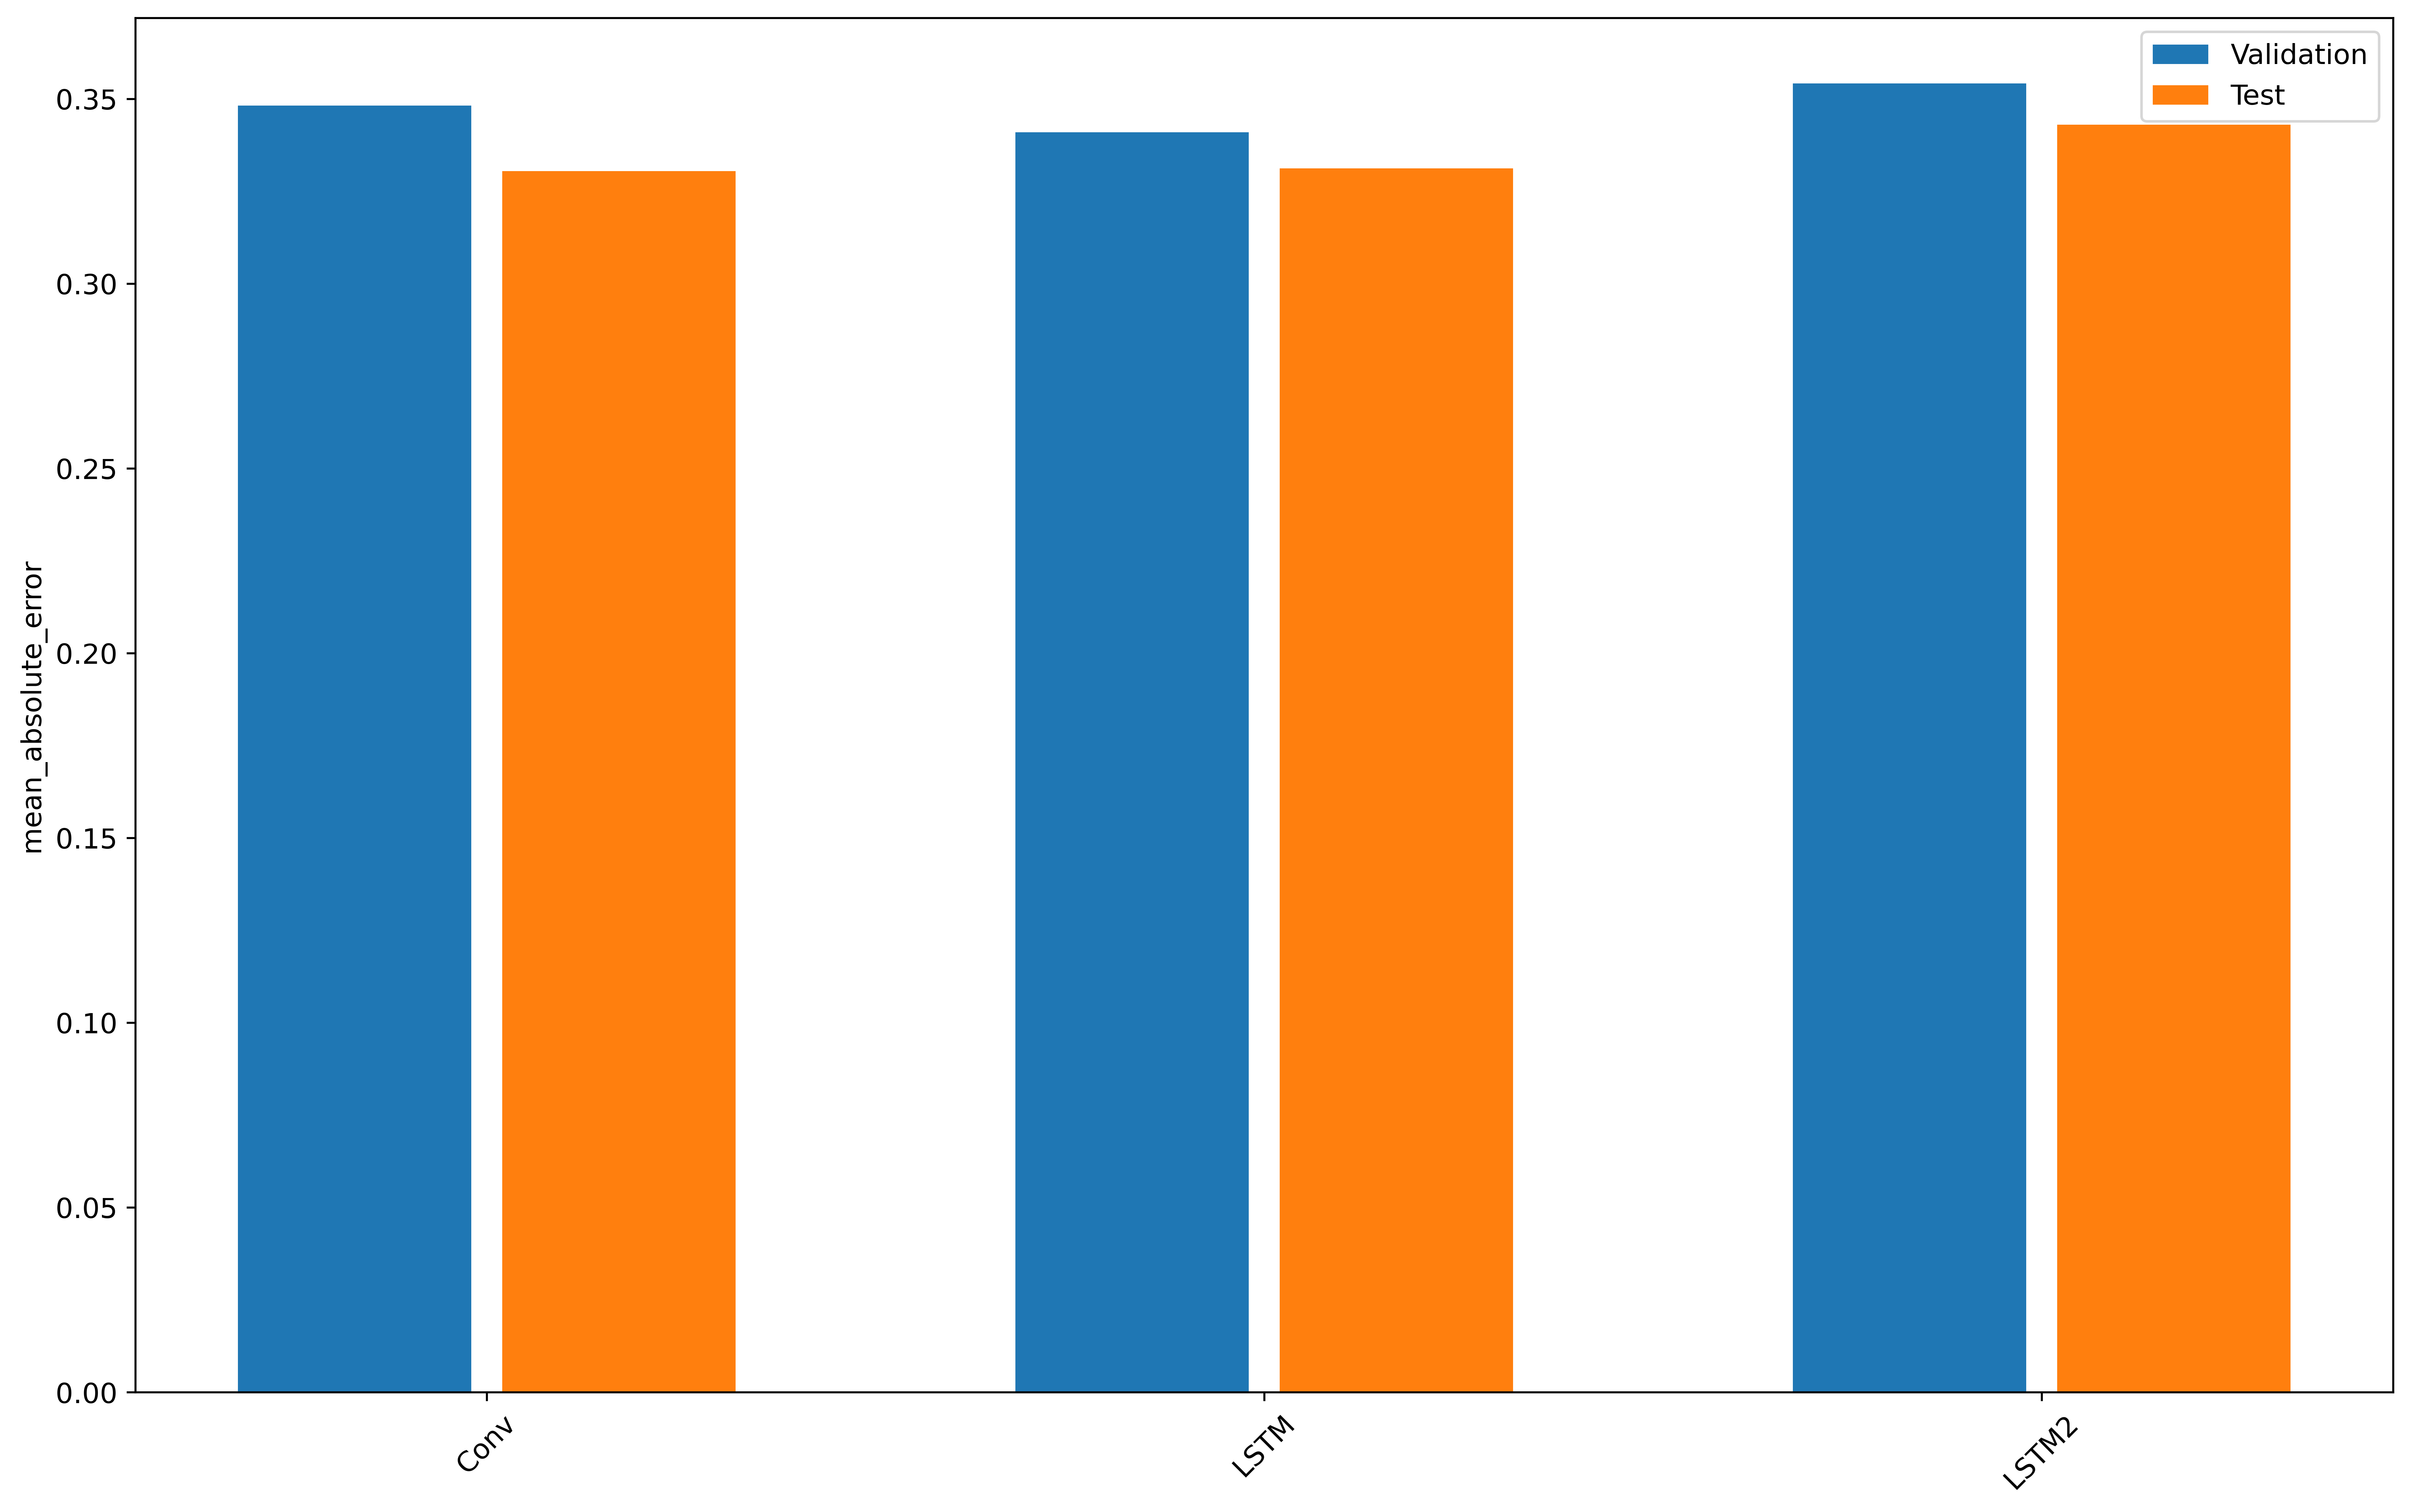

In [61]:
x = np.arange(len(multi_test_performance))
plt.ylabel('mean_absolute_error')
plt.bar(x=x-0.17, height=val_mae, width=0.3, label='Validation')
plt.bar(x=x+0.17, height=test_mae, width=0.3, label='Test')
plt.xticks(ticks=x, labels=multi_test_performance.keys(),rotation=45)
_ = plt.legend()

In [62]:
single_window = WindowGenerator(input_width=6, label_width=5, shift=1,label_columns=['T'])
single_window


Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [2 3 4 5 6]
Label column name(s): ['T']

In [63]:
input_width = 6
label_width = 5
shift = 1
label_columns=['T']


label_columns_indices = {}
if label_columns is not None:
    for i, name in enumerate(label_columns):
        label_columns_indices[name] = i
print(label_columns_indices)

{'T': 0}


In [64]:

column_indices = {}
for i,name in enumerate(train_df.columns):
    column_indices[name] = i
print(column_indices)  

{'p': 0, 'T': 1, 'Tpot': 2, 'Tdew': 3, 'rh': 4, 'VPmax': 5, 'VPact': 6, 'VPdef': 7, 'sh': 8, 'H2OC': 9, 'rho': 10, 'Day sin': 11, 'Day cos': 12, 'Year sin': 13, 'Year cos': 14, 'Wx': 15, 'Wy': 16, 'max Wx': 17, 'max Wy': 18}


In [65]:
total_window_size = input_width + shift  
print(total_window_size)

7


In [66]:
input_indices = np.arange(total_window_size)[0:input_width]  
print(input_indices)

[0 1 2 3 4 5]


In [67]:
label_start = total_window_size - label_width  
print(label_start)

2


In [68]:
label_indices = np.arange(total_window_size)[label_start:] 
print(label_indices)

[2 3 4 5 6]


In [69]:
print('\n'.join([f'Total window size: {total_window_size}',
                 f'Input indices: {input_indices}',
                 f'Label indices: {label_indices}',
                 f'Label column name(s): {label_columns}']))

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [2 3 4 5 6]
Label column name(s): ['T']


In [70]:
single_window.createTrainSet  

<MapDataset shapes: ((None, 6, 19), (None, 5, 1)), types: (tf.float32, tf.float32)>

In [71]:
for train_inputs, train_labels in single_window.createTrainSet.take(1):
    print(f'Inputs shape (batch, time, features): {train_inputs.shape}')
    print(f'Labels shape (batch, time, features): {train_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 5, 1)


In [72]:
@property  
def createTrainSet(self):  
    return self.make_dataset(self.train_df)
WindowGenerator.createTrainSet = createTrainSet

In [73]:

data = train_df

data = np.array(train_df, dtype=np.float32)
data

array([[ 0.9453076 , -1.9824733 , -2.0418885 , ...,  0.22116129,
         0.11114045,  0.21792787],
       [ 0.95976985, -2.078372  , -2.1381664 , ...,  0.22210087,
         0.10945825,  0.22779849],
       [ 0.98628396, -2.0702844 , -2.1324356 , ...,  0.276266  ,
         0.11121805,  0.3240784 ],
       ...,
       [ 0.21737449,  0.74082386,  0.7192235 , ...,  0.64527714,
         0.01396028,  0.60005045],
       [ 0.21375893,  0.71078324,  0.6894232 , ..., -0.10261582,
        -0.09511667, -0.19842635],
       [ 0.16675662,  0.6530128 ,  0.6366996 , ..., -0.32812586,
         0.6272593 , -0.49443465]], dtype=float32)

In [74]:
ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,  
      sequence_length=total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)
ds

<BatchDataset shapes: (None, None, 19), types: tf.float32>

In [75]:
ds_list = list(ds.as_numpy_iterator())
print(len(ds_list),len(ds_list[0]),len(ds_list[0][0]),len(ds_list[0][0][0]))

1534 32 7 19


In [76]:
import numpy as np
lst = np.array(list(range(0, 100)))
lst

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [77]:
tf_lst = tf.keras.preprocessing.timeseries_dataset_from_array(
         lst,targets=None,sequence_length = 10,
         sequence_stride=3,
         sampling_rate=2,
         batch_size=3,
         )

temp_lst = list(tf_lst.as_numpy_iterator())
temp_lst

[array([[ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
        [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21],
        [ 6,  8, 10, 12, 14, 16, 18, 20, 22, 24]]),
 array([[ 9, 11, 13, 15, 17, 19, 21, 23, 25, 27],
        [12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
        [15, 17, 19, 21, 23, 25, 27, 29, 31, 33]]),
 array([[18, 20, 22, 24, 26, 28, 30, 32, 34, 36],
        [21, 23, 25, 27, 29, 31, 33, 35, 37, 39],
        [24, 26, 28, 30, 32, 34, 36, 38, 40, 42]]),
 array([[27, 29, 31, 33, 35, 37, 39, 41, 43, 45],
        [30, 32, 34, 36, 38, 40, 42, 44, 46, 48],
        [33, 35, 37, 39, 41, 43, 45, 47, 49, 51]]),
 array([[36, 38, 40, 42, 44, 46, 48, 50, 52, 54],
        [39, 41, 43, 45, 47, 49, 51, 53, 55, 57],
        [42, 44, 46, 48, 50, 52, 54, 56, 58, 60]]),
 array([[45, 47, 49, 51, 53, 55, 57, 59, 61, 63],
        [48, 50, 52, 54, 56, 58, 60, 62, 64, 66],
        [51, 53, 55, 57, 59, 61, 63, 65, 67, 69]]),
 array([[54, 56, 58, 60, 62, 64, 66, 68, 70, 72],
        [57, 59, 61, 63, 65, 67, 69, 7

In [78]:
print(len(temp_lst),len(temp_lst[0]),len(temp_lst[0][0]))

9 3 10


In [79]:
ds_list = list(ds.as_numpy_iterator())
example_window = tf.stack([ds_list[0][0]])
example_window

<tf.Tensor: shape=(1, 7, 19), dtype=float32, numpy=
array([[[-0.60335803, -0.286334  , -0.2389706 , -0.30830762,
         -0.07888746, -0.4659156 , -0.49116734, -0.31509706,
         -0.48424867, -0.48271   ,  0.10536827,  0.18445288,
         -1.4021617 ,  1.0191895 ,  0.92439824, -0.822563  ,
         -0.5446807 , -0.64413595, -0.35644254],
        [-0.65879667, -0.4284492 , -0.37536424, -0.35563794,
          0.20500892, -0.56858313, -0.53156406, -0.4437881 ,
         -0.5216843 , -0.5226156 ,  0.22427142, -0.18470705,
         -1.4021617 ,  1.0198458 ,  0.92362535, -0.48527846,
         -0.07229203, -0.3560501 ,  0.01640858],
        [-0.69736266, -0.5624766 , -0.5060271 , -0.42448205,
          0.43454215, -0.6595544 , -0.5885948 , -0.53926855,
         -0.5815813 , -0.5789529 ,  0.3424421 , -0.54128814,
         -1.3066057 ,  1.0205015 ,  0.9228519 , -0.20625009,
         -0.08863693, -0.18495893, -0.03795314],
        [-0.7395442 , -0.5902064 , -0.5312427 , -0.46033835,
        

In [80]:
example_inputs, example_labels = single_window.split_window(example_window)
print('训练样本的特征值：',example_inputs)
print('训练样本的标签值：',example_labels)

训练样本的特征值： tf.Tensor(
[[[-0.60335803 -0.286334   -0.2389706  -0.30830762 -0.07888746
   -0.4659156  -0.49116734 -0.31509706 -0.48424867 -0.48271
    0.10536827  0.18445288 -1.4021617   1.0191895   0.92439824
   -0.822563   -0.5446807  -0.64413595 -0.35644254]
  [-0.65879667 -0.4284492  -0.37536424 -0.35563794  0.20500892
   -0.56858313 -0.53156406 -0.4437881  -0.5216843  -0.5226156
    0.22427142 -0.18470705 -1.4021617   1.0198458   0.92362535
   -0.48527846 -0.07229203 -0.3560501   0.01640858]
  [-0.69736266 -0.5624766  -0.5060271  -0.42448205  0.43454215
   -0.6595544  -0.5885948  -0.53926855 -0.5815813  -0.5789529
    0.3424421  -0.54128814 -1.3066057   1.0205015   0.9228519
   -0.20625009 -0.08863693 -0.18495893 -0.03795314]
  [-0.7395442  -0.5902064  -0.5312427  -0.46033835  0.4285018
   -0.6777487  -0.6194864  -0.5434199  -0.60778624 -0.60946894
    0.3595329  -0.86099    -1.1220056   1.0211567   0.9220781
   -0.48257384 -0.30502352 -0.3523602  -0.16595645]
  [-0.7793154  -0.59482

In [81]:
features = example_window

In [82]:
inputs = features[:, 0:input_width, :]  
print(inputs)

tf.Tensor(
[[[-0.60335803 -0.286334   -0.2389706  -0.30830762 -0.07888746
   -0.4659156  -0.49116734 -0.31509706 -0.48424867 -0.48271
    0.10536827  0.18445288 -1.4021617   1.0191895   0.92439824
   -0.822563   -0.5446807  -0.64413595 -0.35644254]
  [-0.65879667 -0.4284492  -0.37536424 -0.35563794  0.20500892
   -0.56858313 -0.53156406 -0.4437881  -0.5216843  -0.5226156
    0.22427142 -0.18470705 -1.4021617   1.0198458   0.92362535
   -0.48527846 -0.07229203 -0.3560501   0.01640858]
  [-0.69736266 -0.5624766  -0.5060271  -0.42448205  0.43454215
   -0.6595544  -0.5885948  -0.53926855 -0.5815813  -0.5789529
    0.3424421  -0.54128814 -1.3066057   1.0205015   0.9228519
   -0.20625009 -0.08863693 -0.18495893 -0.03795314]
  [-0.7395442  -0.5902064  -0.5312427  -0.46033835  0.4285018
   -0.6777487  -0.6194864  -0.5434199  -0.60778624 -0.60946894
    0.3595329  -0.86099    -1.1220056   1.0211567   0.9220781
   -0.48257384 -0.30502352 -0.3523602  -0.16595645]
  [-0.7793154  -0.594828   -0.532

In [83]:
labels = features[:, label_start:, :] 
labels

<tf.Tensor: shape=(1, 5, 19), dtype=float32, numpy=
array([[[-0.69736266, -0.5624766 , -0.5060271 , -0.42448205,
          0.43454215, -0.6595544 , -0.5885948 , -0.53926855,
         -0.5815813 , -0.5789529 ,  0.3424421 , -0.54128814,
         -1.3066057 ,  1.0205015 ,  0.9228519 , -0.20625009,
         -0.08863693, -0.18495893, -0.03795314],
        [-0.7395442 , -0.5902064 , -0.5312427 , -0.46033835,
          0.4285018 , -0.6777487 , -0.6194864 , -0.5434199 ,
         -0.60778624, -0.60946894,  0.3595329 , -0.86099   ,
         -1.1220056 ,  1.0211567 ,  0.9220781 , -0.48257384,
         -0.30502352, -0.3523602 , -0.16595645],
        [-0.7793154 , -0.594828  , -0.53238887, -0.46320686,
          0.43454215, -0.68034786, -0.6218627 , -0.5454955 ,
         -0.6115298 , -0.60946894,  0.3531849 , -1.1220255 ,
         -0.8609416 ,  1.0218112 ,  0.92130375, -0.5958664 ,
         -0.22271031, -0.5082906 , -0.13068609],
        [-0.87211484, -0.60407126, -0.5346812 , -0.4789836 ,
        

In [84]:
print(column_indices)

{'p': 0, 'T': 1, 'Tpot': 2, 'Tdew': 3, 'rh': 4, 'VPmax': 5, 'VPact': 6, 'VPdef': 7, 'sh': 8, 'H2OC': 9, 'rho': 10, 'Day sin': 11, 'Day cos': 12, 'Year sin': 13, 'Year cos': 14, 'Wx': 15, 'Wy': 16, 'max Wx': 17, 'max Wy': 18}


In [85]:
if label_columns is not None:
    for name in label_columns:
        labels = tf.stack([labels[:, :, column_indices[name]] ],axis=-1)
        
print(labels)

tf.Tensor(
[[[-0.5624766 ]
  [-0.5902064 ]
  [-0.594828  ]
  [-0.60407126]
  [-0.6803282 ]]], shape=(1, 5, 1), dtype=float32)


In [86]:
ds = ds.map(single_window.split_window)
ds

<MapDataset shapes: ((None, 6, 19), (None, 5, 1)), types: (tf.float32, tf.float32)>

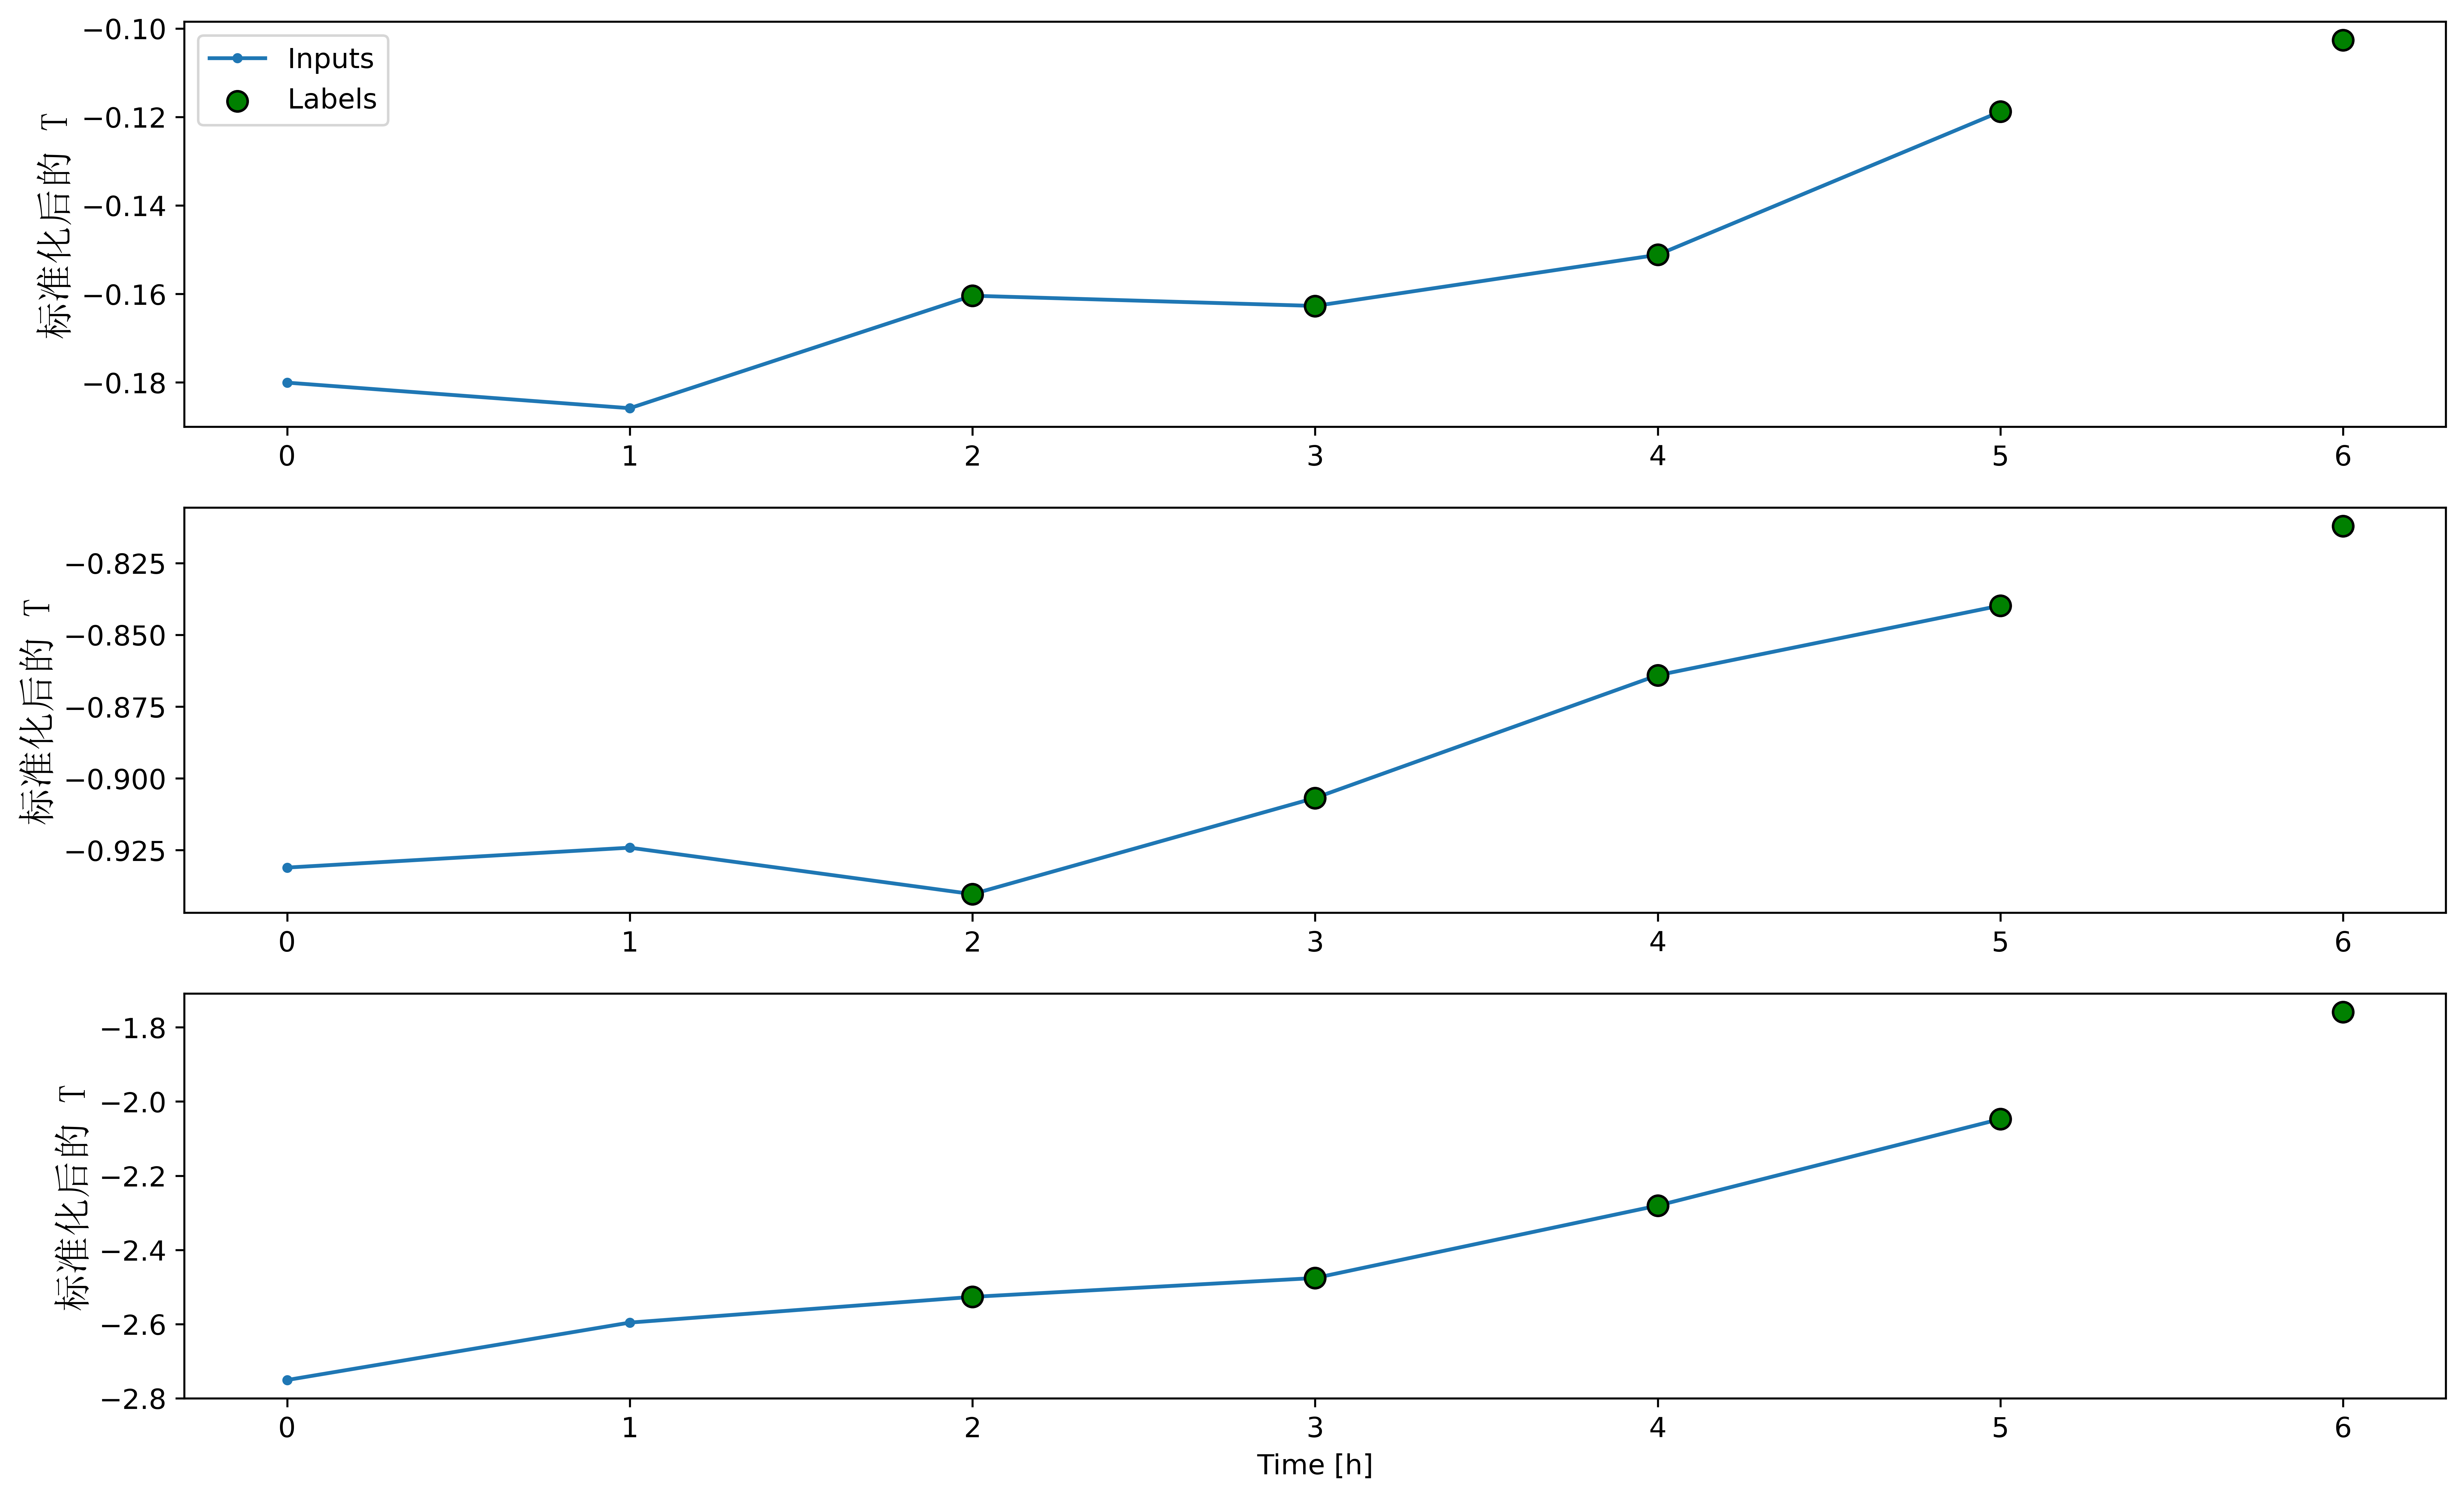

In [87]:
single_window.plot()

In [88]:
plot_col='T'
max_subplots=3
model=None

In [89]:
inputs, labels = single_window.example
plot_col_index = column_indices[plot_col]  
max_n = min(max_subplots, len(inputs)) 

print(inputs)
print('----------------------------------分界线----------------------------------------')
print(labels)
print('----------------------------------分界线----------------------------------------')
print(plot_col_index)

tf.Tensor(
[[[ 0.57772547 -0.18003647 -0.22407044 ... -1.770488   -0.31438205
   -2.252302  ]
  [ 0.64160043 -0.1858135  -0.23438594 ... -0.33803916 -0.01528686
   -0.49242648]
  [ 0.625933   -0.16039452 -0.20802413 ... -1.4270117  -0.14722727
   -1.6741577 ]
  [ 0.61749667 -0.16270535 -0.21031646 ... -1.6195843  -0.3144945
   -1.7051843 ]
  [ 0.64762634 -0.15115125 -0.20114714 ... -1.092148   -0.1121593
   -0.9759205 ]
  [ 0.6596782  -0.11879983 -0.17020069 ... -0.44806558 -0.42683417
   -0.6860967 ]]

 [[-1.1276145  -0.9310518  -0.8418535  ... -0.948076   -1.3964342
   -1.1430975 ]
  [-1.1276145  -0.92411935 -0.8349765  ... -0.4763559  -1.0033417
   -0.95636576]
  [-1.0769967  -0.94029504 -0.8544613  ... -0.44576055 -0.29903194
   -0.6938307 ]
  [-1.0697656  -0.90678823 -0.8212225  ... -0.6151105  -1.1033053
   -0.66672426]
  [-0.9974543  -0.8640381  -0.78454524 ... -1.223166   -1.0645336
   -1.6883599 ]
  [-0.931169   -0.83977455 -0.7650604  ... -0.70033693 -0.7779735
   -0.64683396

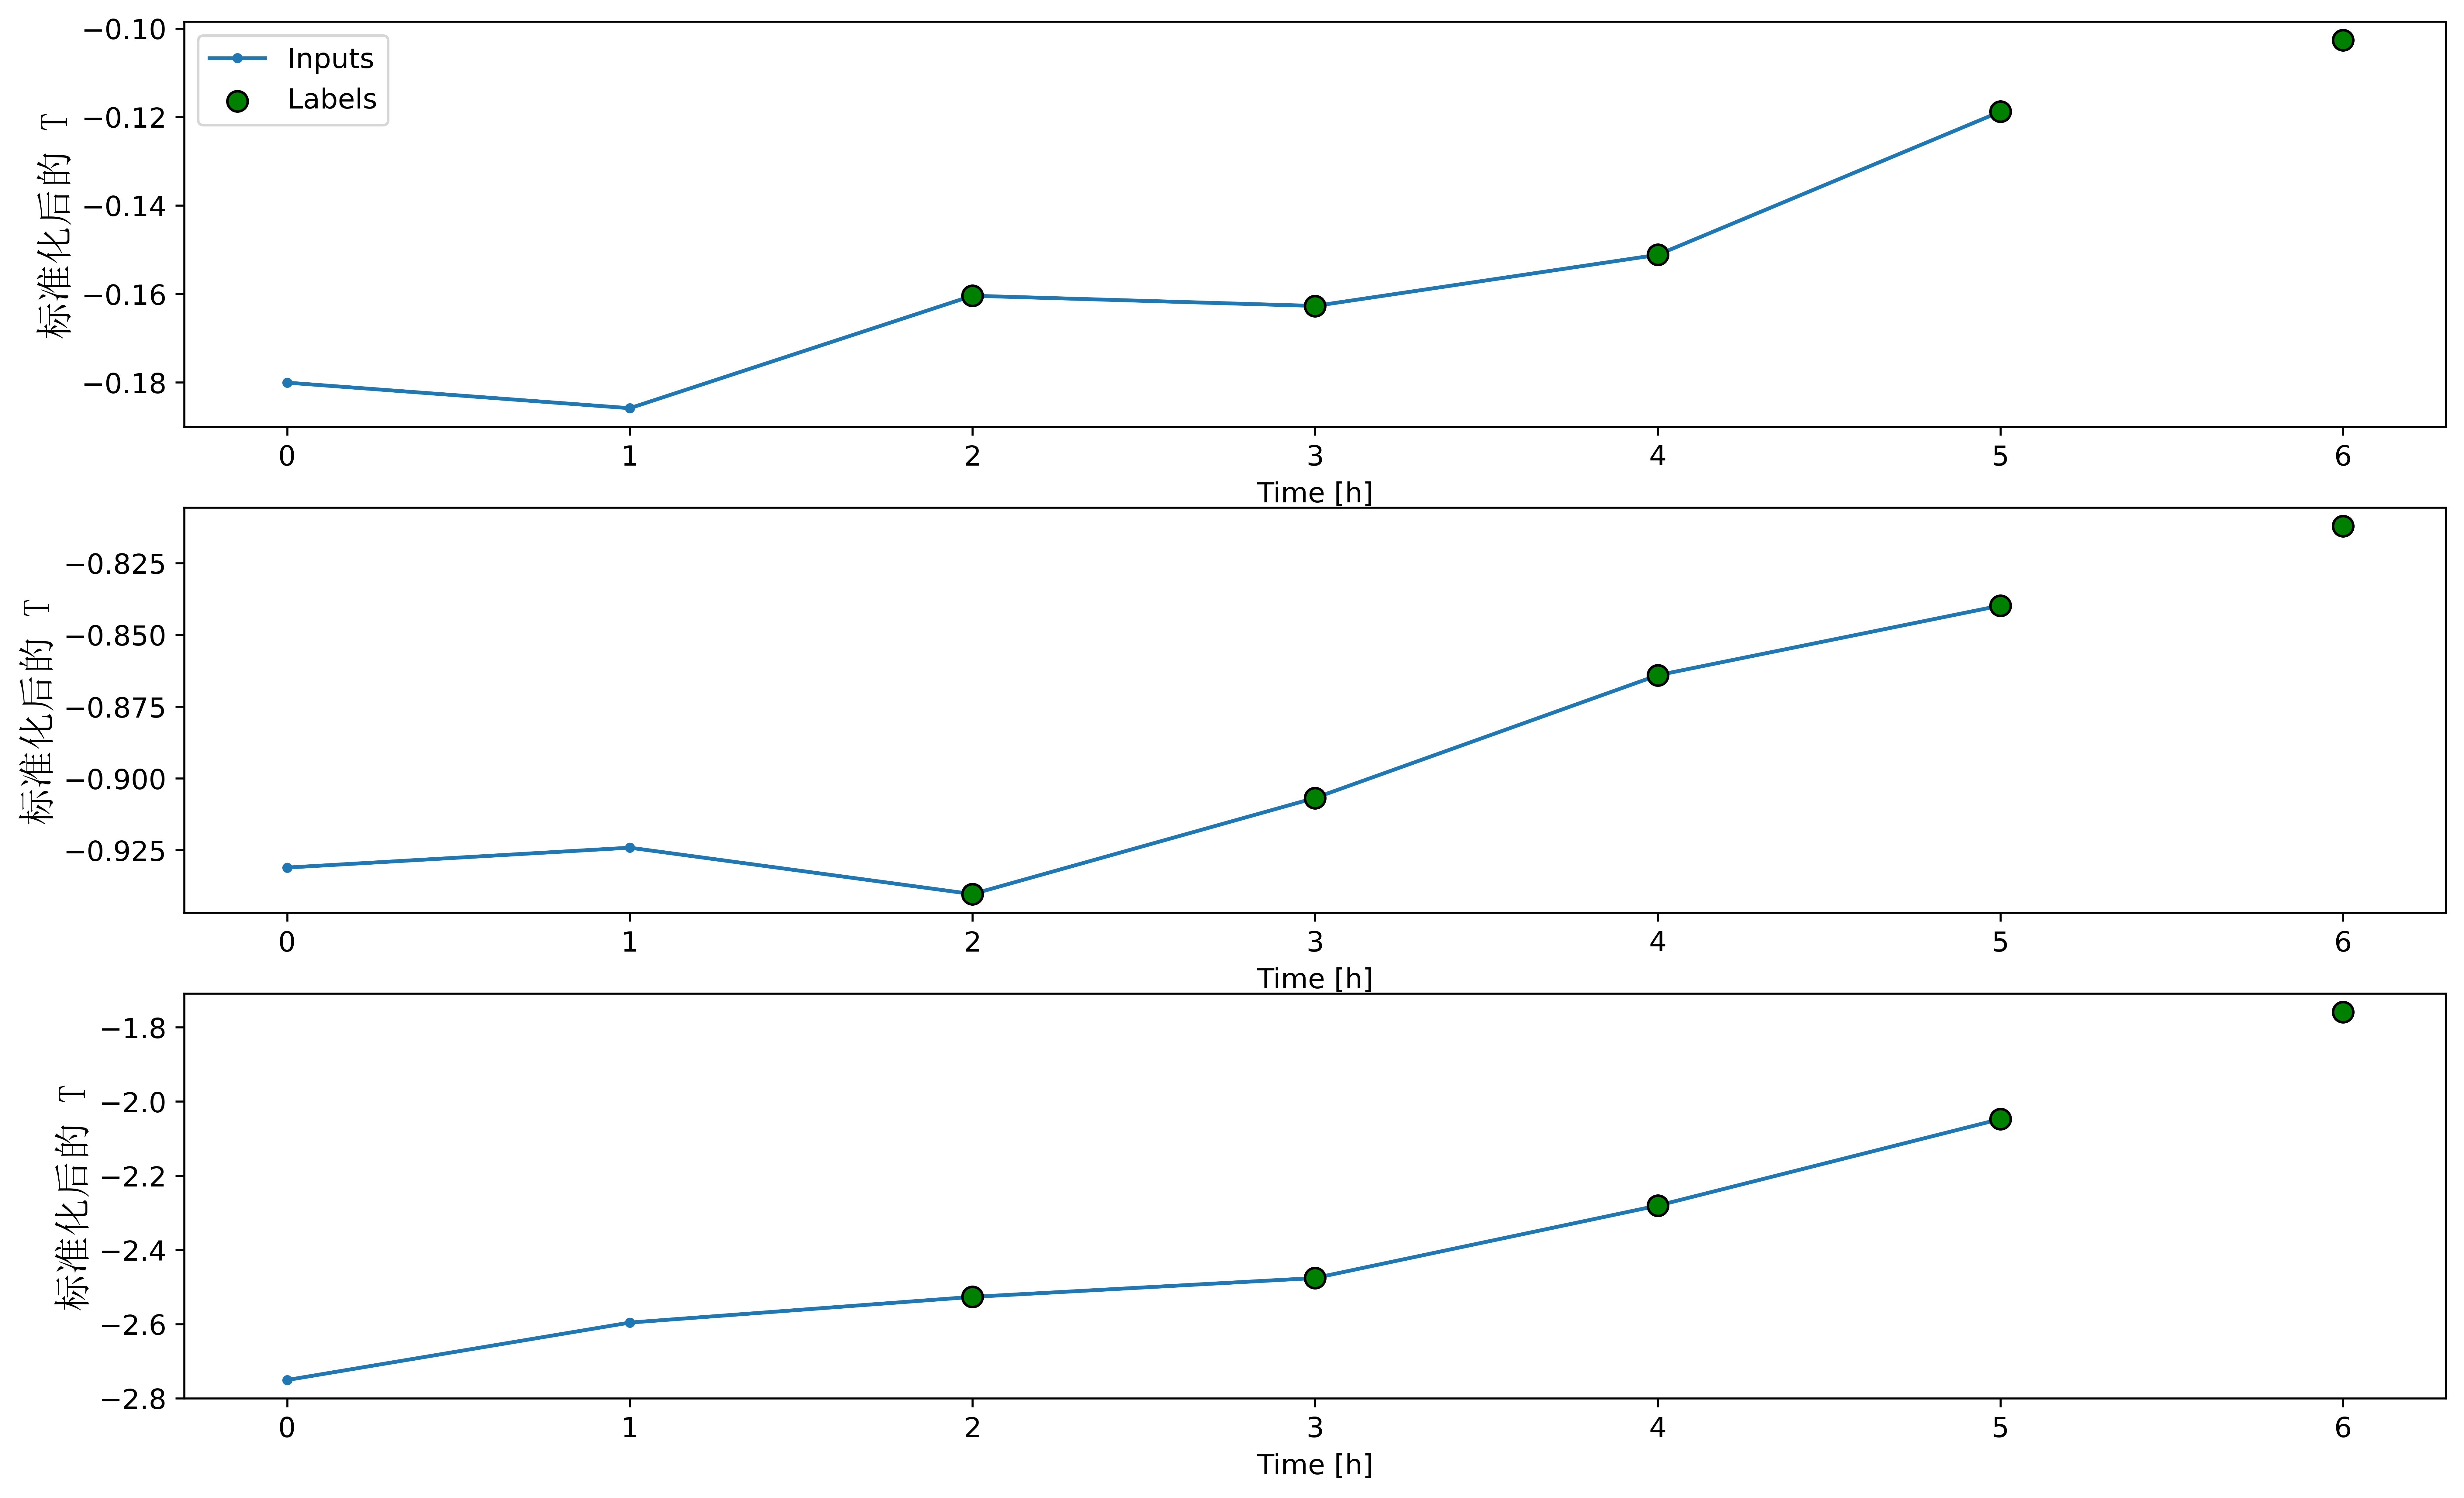

In [90]:
for n in range(max_n):
   
    plt.subplot(3, 1, n+1)       
    plt.ylabel(f'标准化后的 {plot_col}',FontProperties=font_set) 
    
    plt.plot(input_indices, inputs[n, :, plot_col_index],label='Inputs', marker='.',zorder=-10)

   
    if label_columns:  
        label_col_index = label_columns_indices.get(plot_col, None)
   
    else:
        label_col_index = plot_col_index

    if label_col_index is None:
        continue

    
    plt.scatter(label_indices, labels[n, :, label_col_index],edgecolors='k', label='Labels', c='green', s=64) 
            
    
    if model is not None:
        predictions = model(inputs)
        plt.scatter(label_indices, predictions[n, :, label_col_index], marker='X', edgecolors='k', label='Predictions',c='orange', s=64)

    if n == 0:
        plt.legend()
    plt.xlabel('Time [h]')

**附注：**

In [91]:

wide_window = WindowGenerator(
    input_width=6, label_width=6, shift=1,
    label_columns=['T'])

wide_window

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [1 2 3 4 5 6]
Label column name(s): ['T']

In [92]:

for example_inputs, example_labels in wide_window.createTrainSet.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 6, 1)


In [93]:

class Baseline(tf.keras.Model):
   
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
    
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [94]:
baseline=Baseline(label_index=column_indices['T'])
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [95]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 6, 19)
Output shape: (32, 6, 1)


In [96]:

baseline = Baseline(label_index=column_indices['T'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}

val_performance['Baseline'] = baseline.evaluate(wide_window.createValSet)
performance['Baseline'] = baseline.evaluate(wide_window.createTestSet)


219/219 [==============================] - 0s 1ms/step - loss: 0.0142 - mean_absolute_error: 0.0852


In [97]:

linear = tf.keras.Sequential([
    
    tf.keras.layers.Dense(units=1)
])

In [98]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 6, 19)
Output shape: (32, 6, 1)


In [99]:
history = compile_and_fit(linear, wide_window)

Epoch 1/20
1534/1534 - 2s - loss: 0.1375 - mean_absolute_error: 0.1961 - val_loss: 0.0106 - val_mean_absolute_error: 0.0770
Epoch 2/20
1534/1534 - 2s - loss: 0.0103 - mean_absolute_error: 0.0752 - val_loss: 0.0097 - val_mean_absolute_error: 0.0737
Epoch 3/20
1534/1534 - 2s - loss: 0.0097 - mean_absolute_error: 0.0727 - val_loss: 0.0093 - val_mean_absolute_error: 0.0719
Epoch 4/20
1534/1534 - 2s - loss: 0.0094 - mean_absolute_error: 0.0712 - val_loss: 0.0090 - val_mean_absolute_error: 0.0701
Epoch 5/20
1534/1534 - 2s - loss: 0.0093 - mean_absolute_error: 0.0705 - val_loss: 0.0090 - val_mean_absolute_error: 0.0701
Epoch 6/20
1534/1534 - 2s - loss: 0.0092 - mean_absolute_error: 0.0701 - val_loss: 0.0088 - val_mean_absolute_error: 0.0694
Epoch 7/20
1534/1534 - 2s - loss: 0.0091 - mean_absolute_error: 0.0699 - val_loss: 0.0089 - val_mean_absolute_error: 0.0702
Epoch 8/20
1534/1534 - 2s - loss: 0.0091 - mean_absolute_error: 0.0697 - val_loss: 0.0088 - val_mean_absolute_error: 0.0694


In [100]:

val_performance['Linear'] = linear.evaluate(wide_window.createValSet)

performance['Linear'] = linear.evaluate(wide_window.createTestSet,verbose=0)


438/438 [==============================] - 1s 1ms/step - loss: 0.0088 - mean_absolute_error: 0.0694


In [101]:
dense = tf.keras.Sequential([
  
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

训练、评估dense模型

In [102]:
history = compile_and_fit(dense, wide_window)

val_performance['Dense'] = dense.evaluate(wide_window.createValSet)
performance['Dense'] = dense.evaluate(wide_window.createTestSet, verbose=0)

Epoch 1/20
1534/1534 - 3s - loss: 0.0136 - mean_absolute_error: 0.0749 - val_loss: 0.0074 - val_mean_absolute_error: 0.0624
Epoch 2/20
1534/1534 - 3s - loss: 0.0070 - mean_absolute_error: 0.0600 - val_loss: 0.0071 - val_mean_absolute_error: 0.0606
Epoch 3/20
1534/1534 - 3s - loss: 0.0067 - mean_absolute_error: 0.0584 - val_loss: 0.0066 - val_mean_absolute_error: 0.0578
Epoch 4/20
1534/1534 - 3s - loss: 0.0065 - mean_absolute_error: 0.0576 - val_loss: 0.0079 - val_mean_absolute_error: 0.0621
Epoch 5/20
1534/1534 - 3s - loss: 0.0064 - mean_absolute_error: 0.0566 - val_loss: 0.0068 - val_mean_absolute_error: 0.0579
438/438 [==============================] - 1s 1ms/step - loss: 0.0068 - mean_absolute_error: 0.0579


In [103]:
CONV_WIDTH = 3

conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['T'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['T']

In [104]:
conv_model = tf.keras.Sequential([
    
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    
])

In [105]:

history = compile_and_fit(conv_model, conv_window)

val_performance['Conv'] = conv_model.evaluate(conv_window.createValSet)
performance['Conv'] = conv_model.evaluate(conv_window.createTestSet, verbose=0)

Epoch 1/20
1534/1534 - 3s - loss: 0.0233 - mean_absolute_error: 0.0984 - val_loss: 0.0086 - val_mean_absolute_error: 0.0680
Epoch 2/20
1534/1534 - 3s - loss: 0.0082 - mean_absolute_error: 0.0655 - val_loss: 0.0074 - val_mean_absolute_error: 0.0612
Epoch 3/20
1534/1534 - 3s - loss: 0.0076 - mean_absolute_error: 0.0626 - val_loss: 0.0066 - val_mean_absolute_error: 0.0572
Epoch 4/20
1534/1534 - 3s - loss: 0.0071 - mean_absolute_error: 0.0601 - val_loss: 0.0068 - val_mean_absolute_error: 0.0591
Epoch 5/20
1534/1534 - 3s - loss: 0.0070 - mean_absolute_error: 0.0594 - val_loss: 0.0065 - val_mean_absolute_error: 0.0574
Epoch 6/20
1534/1534 - 3s - loss: 0.0068 - mean_absolute_error: 0.0583 - val_loss: 0.0063 - val_mean_absolute_error: 0.0557
Epoch 7/20
1534/1534 - 3s - loss: 0.0067 - mean_absolute_error: 0.0578 - val_loss: 0.0061 - val_mean_absolute_error: 0.0543
Epoch 8/20
1534/1534 - 3s - loss: 0.0067 - mean_absolute_error: 0.0575 - val_loss: 0.0061 - val_mean_absolute_error: 0.0546
Epoch 9/

In [106]:
lstm_model = tf.keras.models.Sequential([
    
    tf.keras.layers.LSTM(32, return_sequences=True),
    
    tf.keras.layers.Dense(units=1)
])


In [107]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 6, 19)
Output shape: (32, 6, 1)


In [108]:

history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.createValSet)
performance['LSTM'] = lstm_model.evaluate(wide_window.createTestSet, verbose=0)

Epoch 1/20
1534/1534 - 6s - loss: 0.0257 - mean_absolute_error: 0.0907 - val_loss: 0.0067 - val_mean_absolute_error: 0.0577
Epoch 2/20
1534/1534 - 5s - loss: 0.0067 - mean_absolute_error: 0.0575 - val_loss: 0.0062 - val_mean_absolute_error: 0.0551
Epoch 3/20
1534/1534 - 5s - loss: 0.0064 - mean_absolute_error: 0.0558 - val_loss: 0.0063 - val_mean_absolute_error: 0.0550
Epoch 4/20
1534/1534 - 6s - loss: 0.0062 - mean_absolute_error: 0.0549 - val_loss: 0.0060 - val_mean_absolute_error: 0.0542
Epoch 5/20
1534/1534 - 6s - loss: 0.0061 - mean_absolute_error: 0.0543 - val_loss: 0.0059 - val_mean_absolute_error: 0.0533
Epoch 6/20
1534/1534 - 5s - loss: 0.0060 - mean_absolute_error: 0.0538 - val_loss: 0.0061 - val_mean_absolute_error: 0.0547
Epoch 7/20
1534/1534 - 5s - loss: 0.0059 - mean_absolute_error: 0.0534 - val_loss: 0.0058 - val_mean_absolute_error: 0.0532
Epoch 8/20
1534/1534 - 6s - loss: 0.0059 - mean_absolute_error: 0.0532 - val_loss: 0.0059 - val_mean_absolute_error: 0.0533
Epoch 9/

In [109]:
performance

{'Baseline': [0.014168651774525642, 0.0851813480257988],
 'Linear': [0.008613371290266514, 0.06777544319629669],
 'Dense': [0.0068573723547160625, 0.05898650363087654],
 'Conv': [0.006402000784873962, 0.05682844668626785],
 'LSTM': [0.00572033179923892, 0.0533219538629055]}

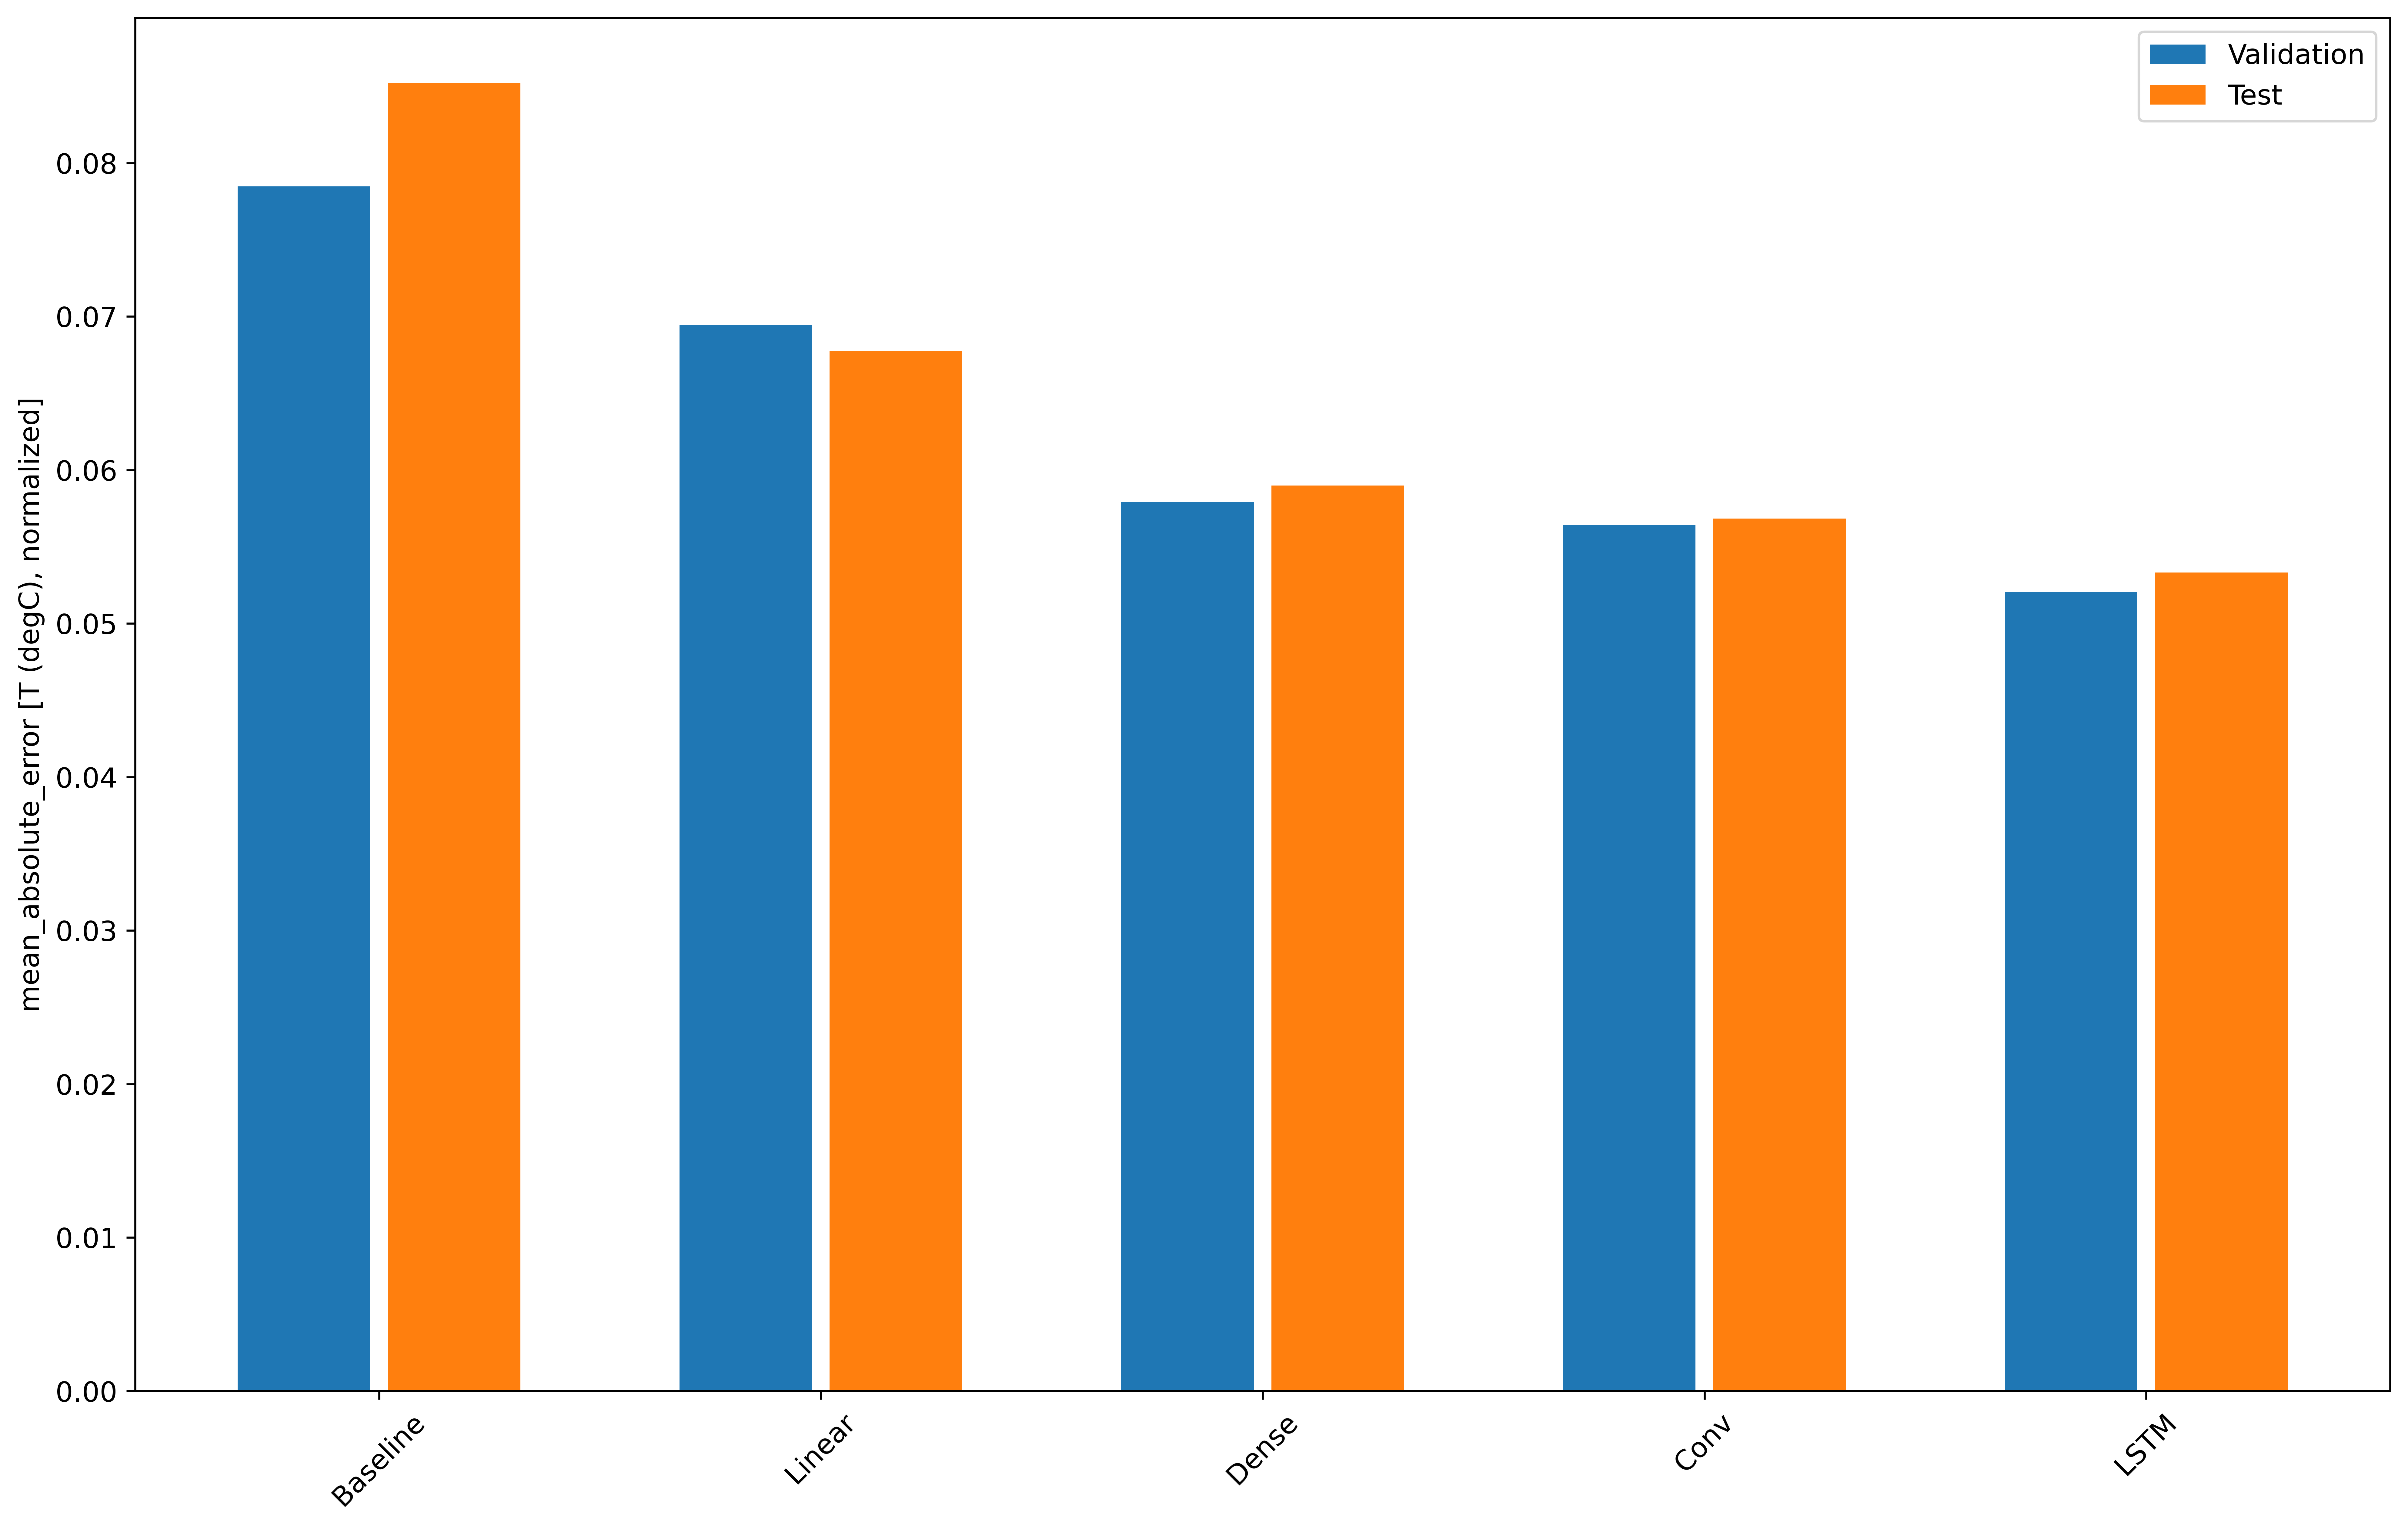

In [110]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()